In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [53]:
df = pd.read_csv("sorting_experiments.csv")

In [29]:
df["scheme_pivot"] = df["scheme"] + "_" + df["pivot"]
df = df.drop(columns=["scheme", "pivot"])
df

data_type   size      time  time_min  time_max    swaps  comparisons  \
0     identical    100  0.001113  0.000860  0.001472       99         5049   
1     identical    100  0.000867  0.000489  0.001285      192         5049   
2     identical    100  0.000792  0.000524  0.001024      198         5346   
3     identical    100  0.001507  0.001356  0.001591      193         5343   
4     identical    100  0.000493  0.000371  0.000675      415         1245   
..          ...    ...       ...       ...       ...      ...          ...   
475  triangular  20000  0.076449  0.073099  0.078936    91158       494977   
476  triangular  20000  0.115971  0.114996  0.117907   107993      1082694   
477  triangular  20000  0.105528  0.100609  0.113518   108918       495192   
478  triangular  20000  0.912983  0.893330  0.937624  3827860      7618779   
479  triangular  20000  0.083115  0.080660  0.084792   288697       289830   

     memory_used                              scheme_pivot  
0           8316                      QuickSortLomuto_last  
1           8316                    QuickSortLomuto_random  
2           8316           QuickSortLomuto_median_of_three  
3           8316    QuickSortLomuto_median_of_three_random  
4          13860                       QuickSortHoare_last  
..           ...                                       ...  
475      2799860                     QuickSortHoare_random  
476      2799860            QuickSortHoare_median_of_three  
477      2799860     QuickSortHoare_median_of_three_random  
478      1954708               QuickSortDoublePivot_double  
479      1400000  QuickSortDijkstra_median_of_three_random  

[480 rows x 9 columns]

по иксу всегда идет size;
нарисовать график time vs size, каждая линия это scheme_pivot(всего линий получается 10)
сделать такое для каждого data_type

In [ ]:

def plot_metric_vs_size(data_types, metric):
    folder_name = f"{metric}_plots"
    os.makedirs(folder_name, exist_ok=True)

    unique_scheme_pivots = df["scheme_pivot"].unique()

    palette = sns.color_palette("tab10", len(unique_scheme_pivots))
    color_mapping = {scheme_pivot: color for scheme_pivot, color in zip(unique_scheme_pivots, palette)}

    for data_type in data_types:
        plt.figure(figsize=(12, 6))

        subset = df[df["data_type"] == data_type]

        sns.lineplot(data=subset, x="size", y=metric, hue="scheme_pivot", marker="o", palette=color_mapping)

        plt.title(f"{metric} vs Size for Data Type: {data_type}", fontsize=16)
        plt.xlabel("Size", fontsize=12)
        plt.ylabel(metric, fontsize=12)
        plt.legend(title="Scheme_Pivot", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.grid(True)
        plt.tight_layout()
        
        save_path = os.path.join(folder_name, f"{metric}_vs_size_{data_type}.png")
        plt.savefig(save_path)



C:\Users\grund\AppData\Local\Temp\ipykernel_12792\3702968542.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


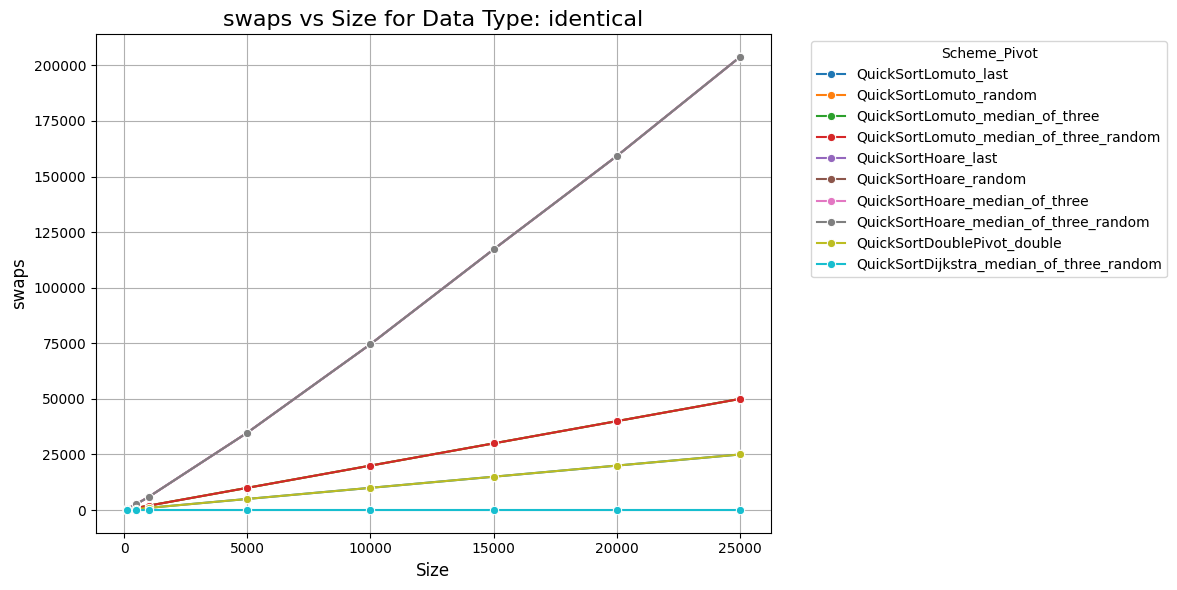

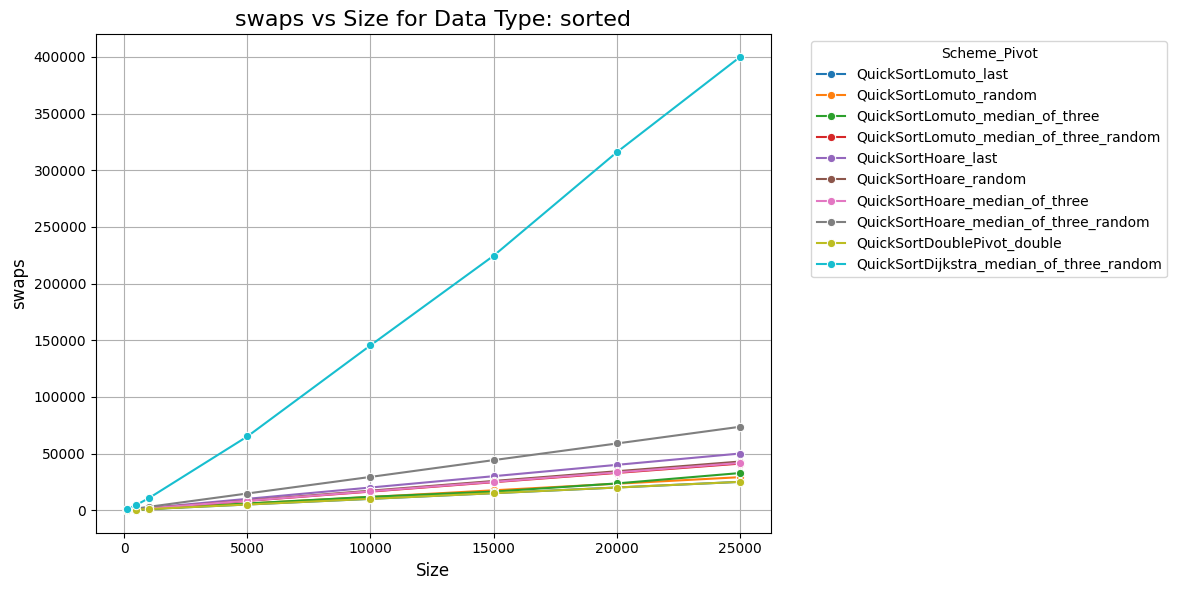

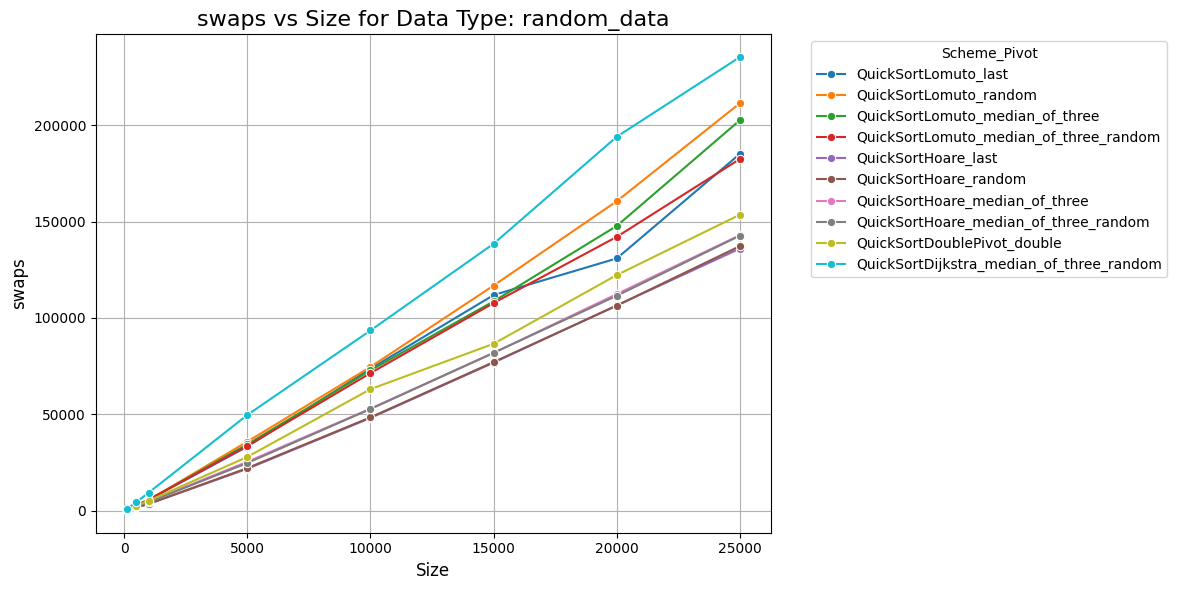

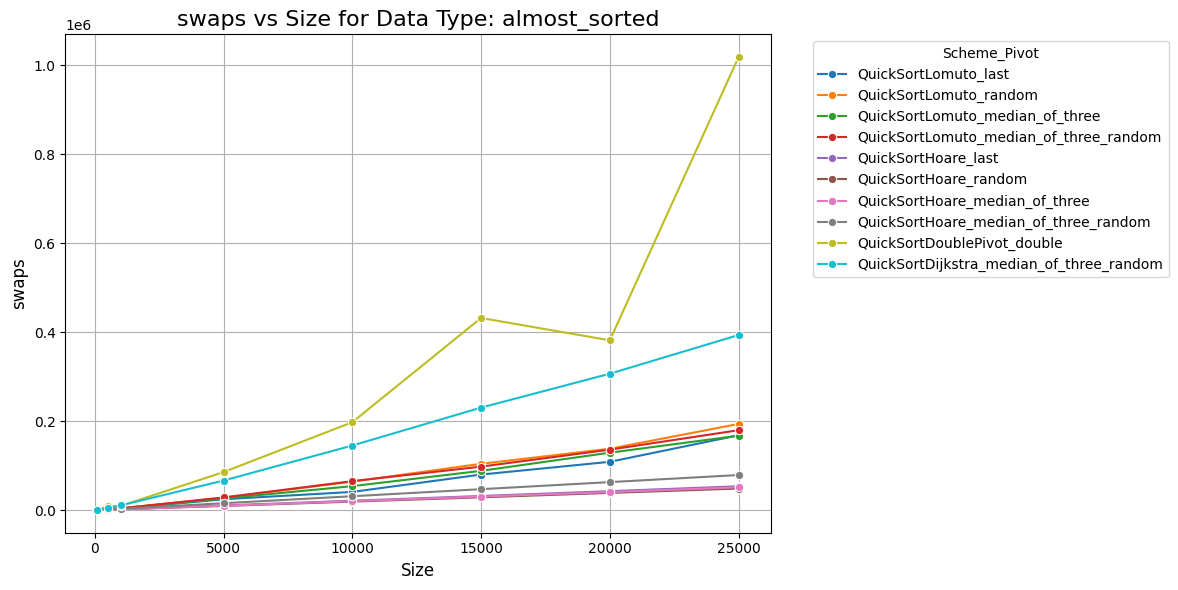

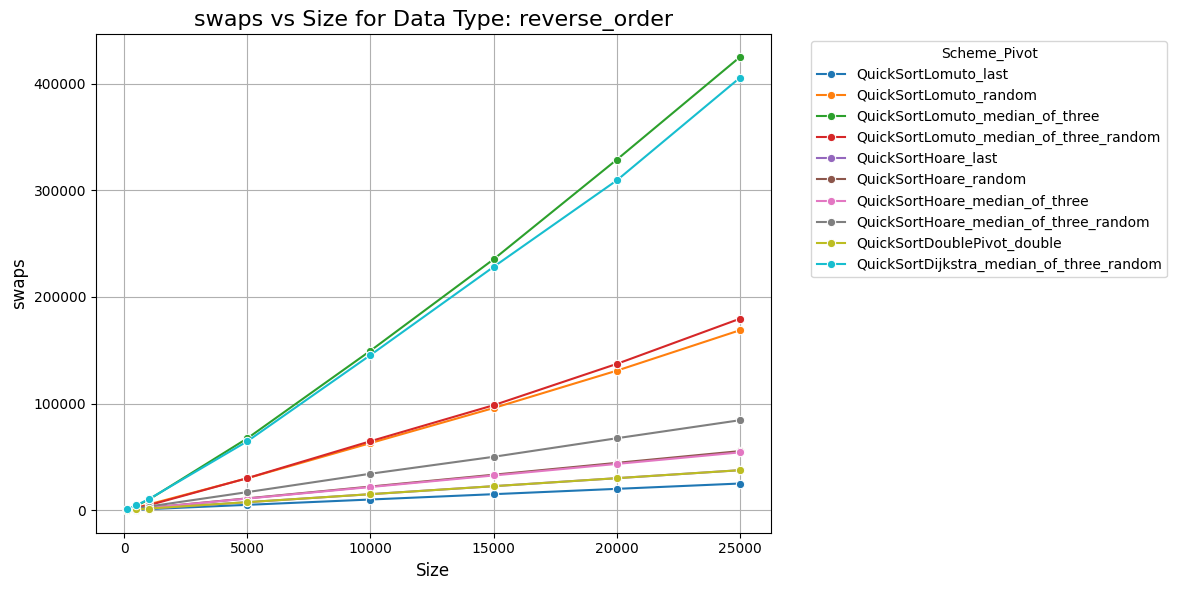

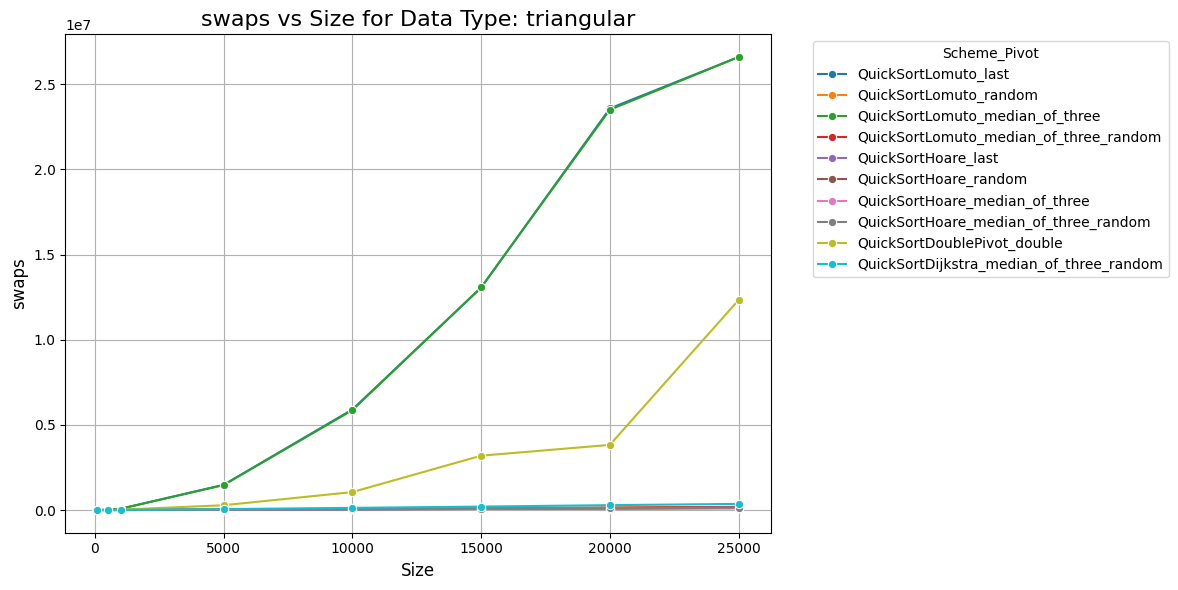

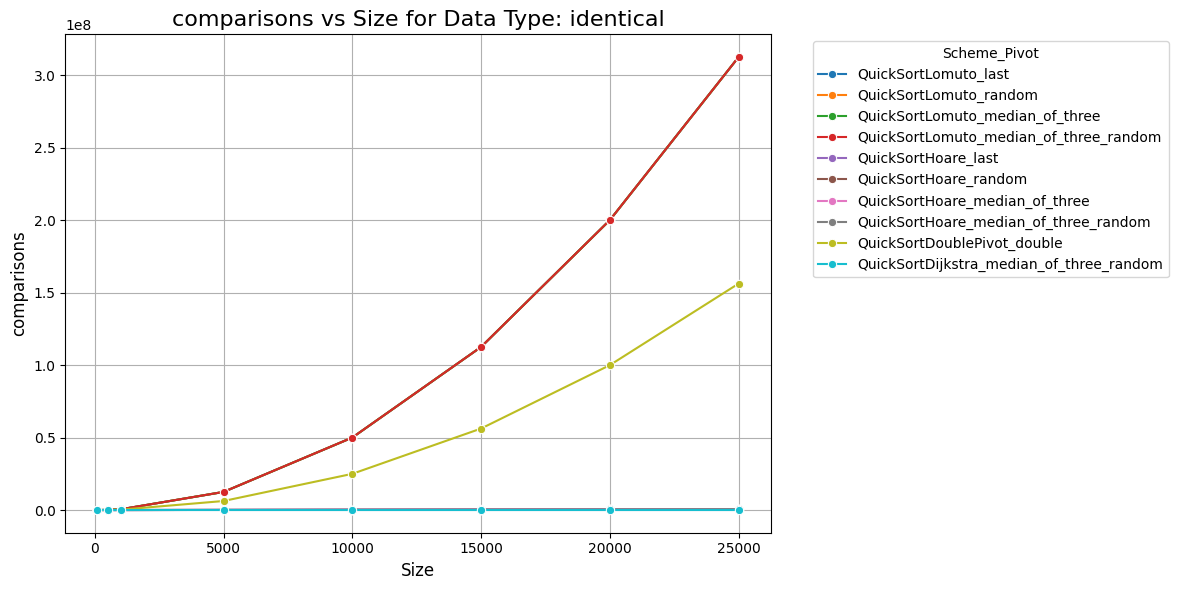

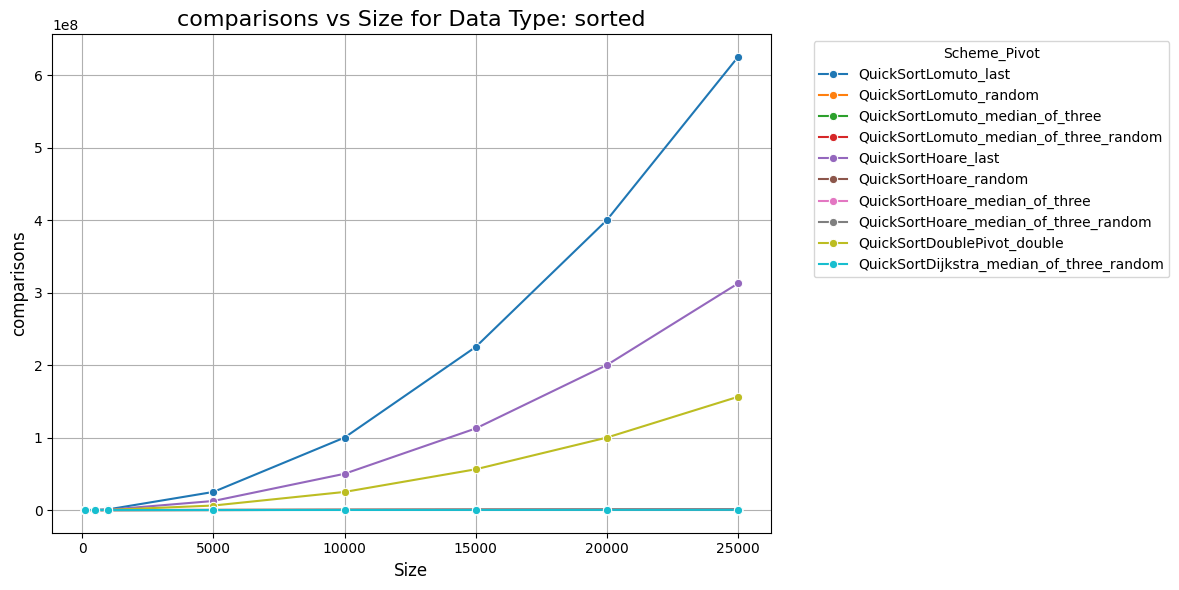

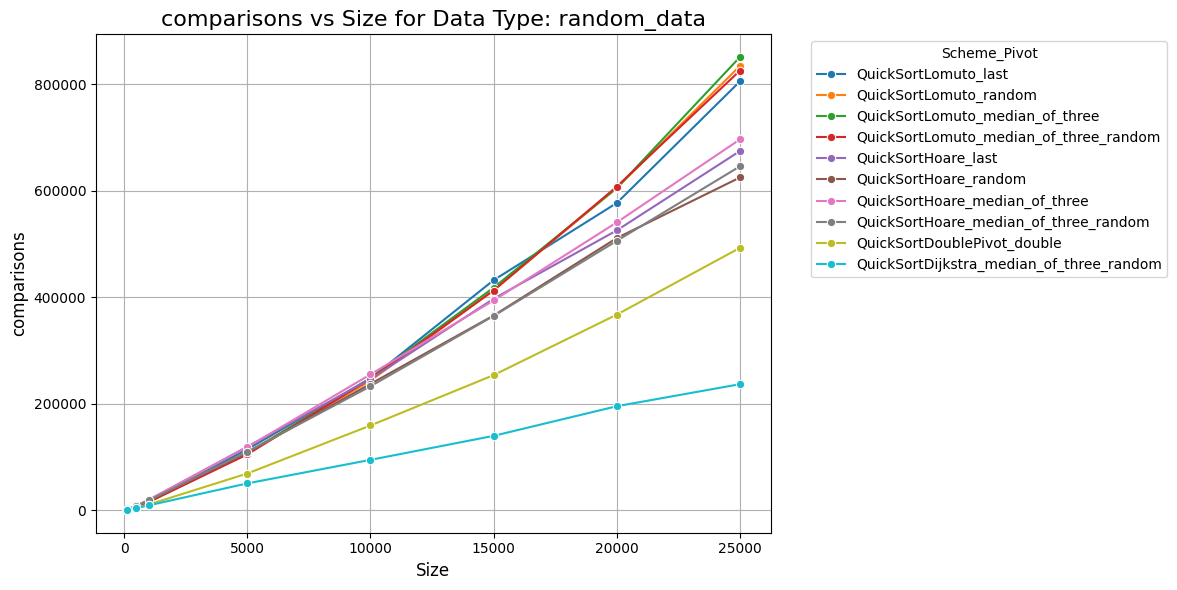

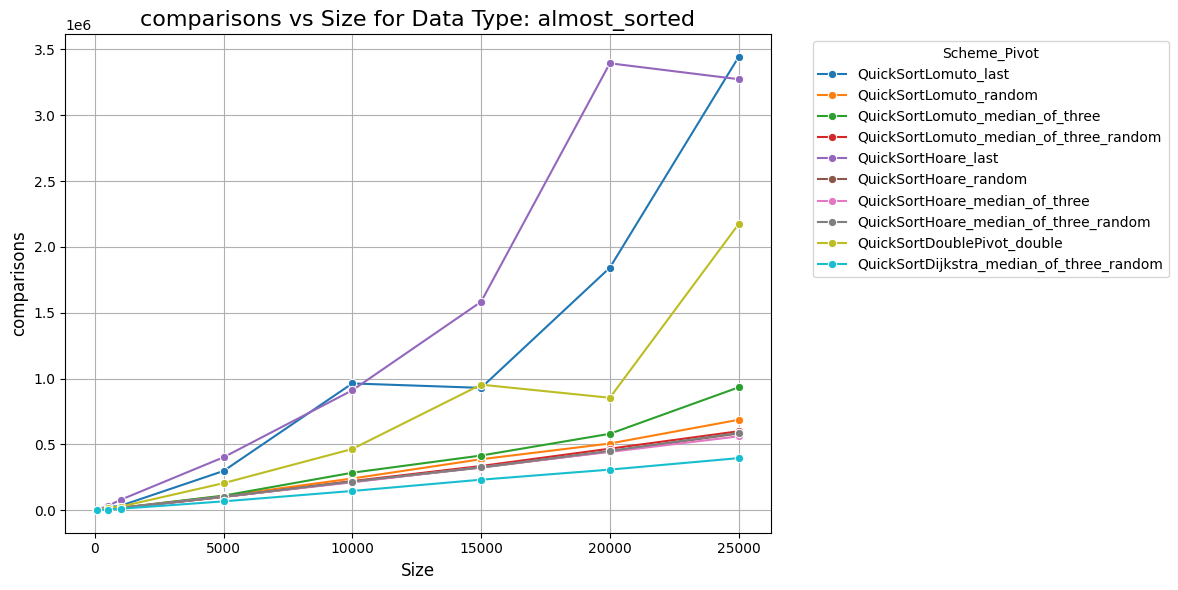

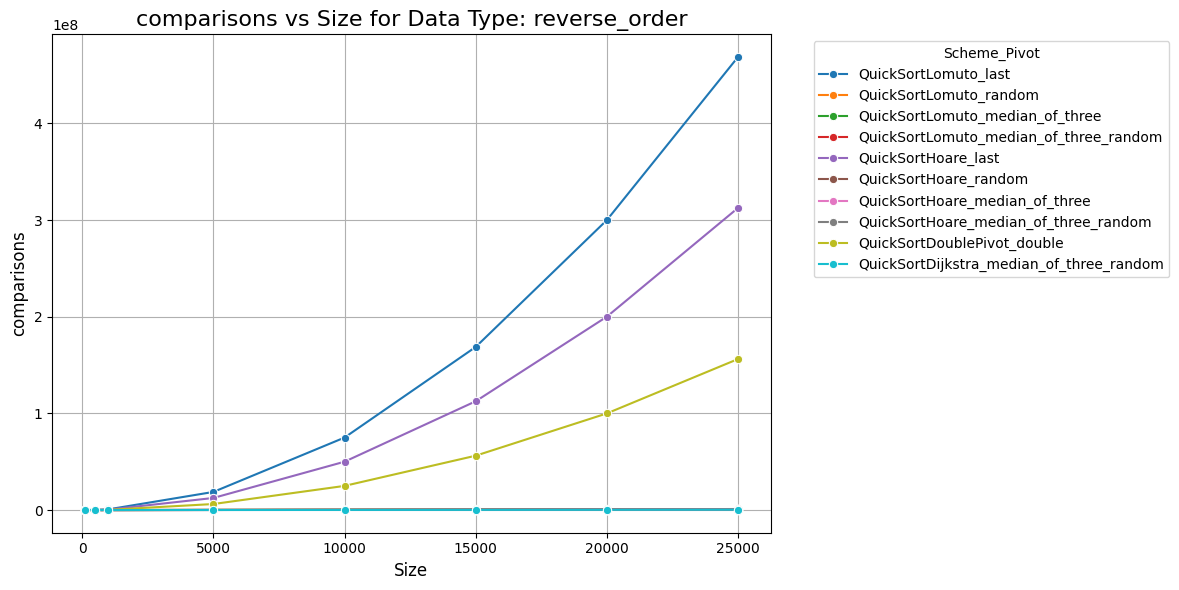

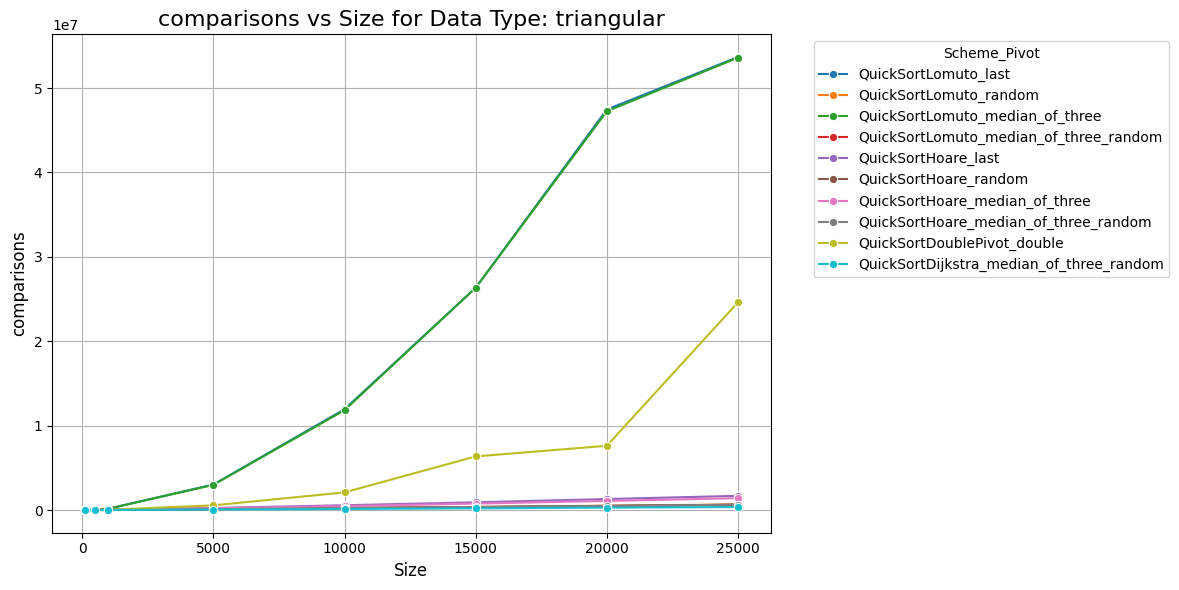

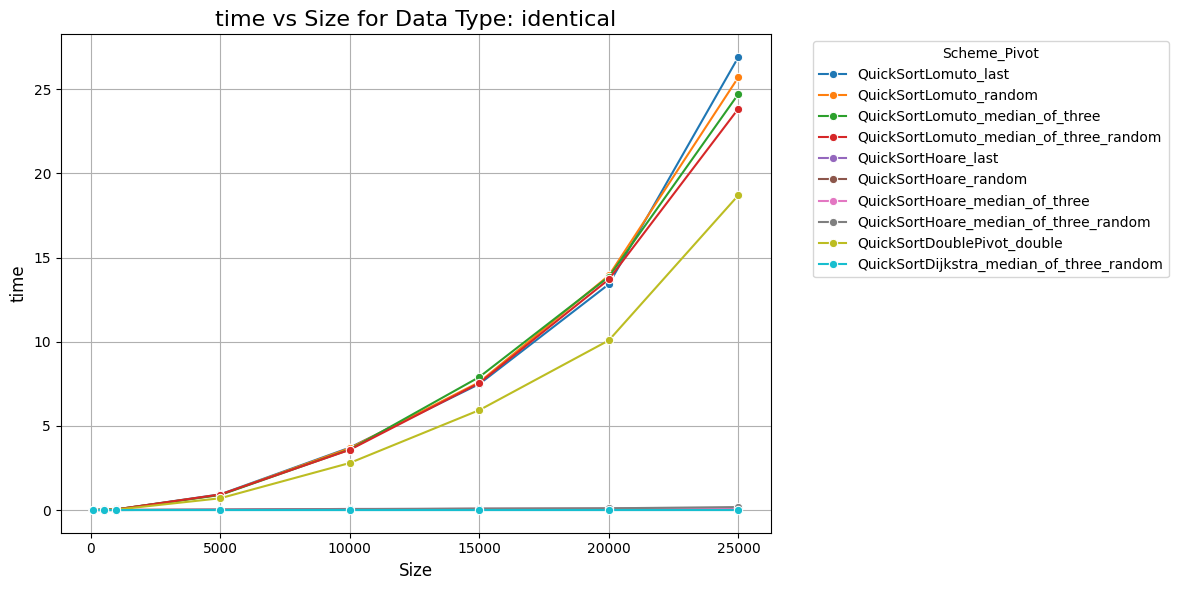

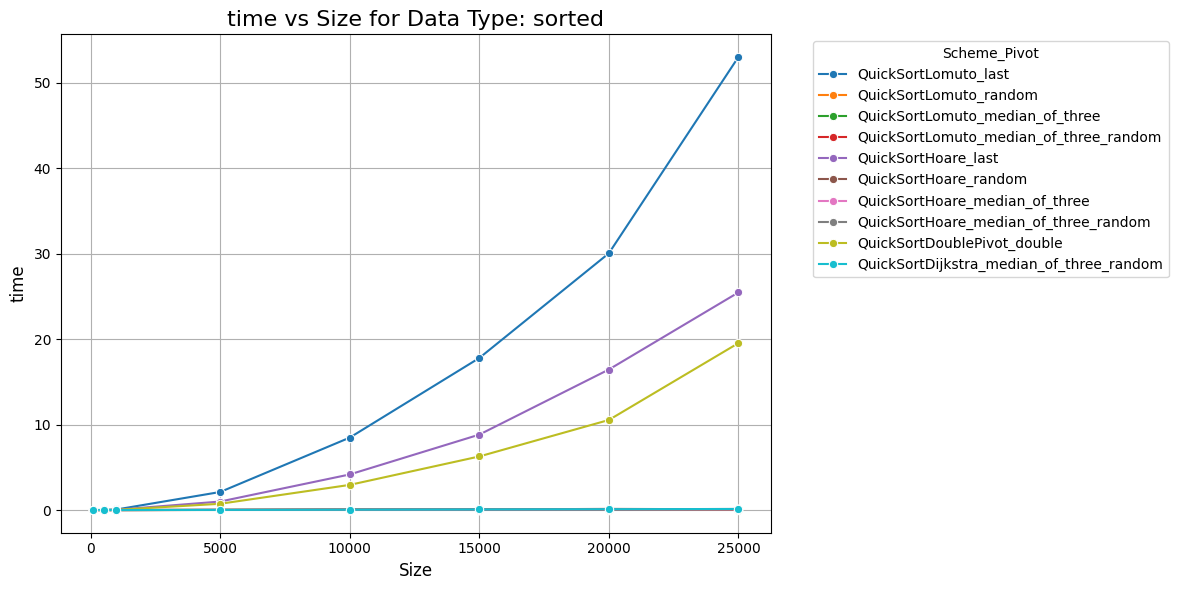

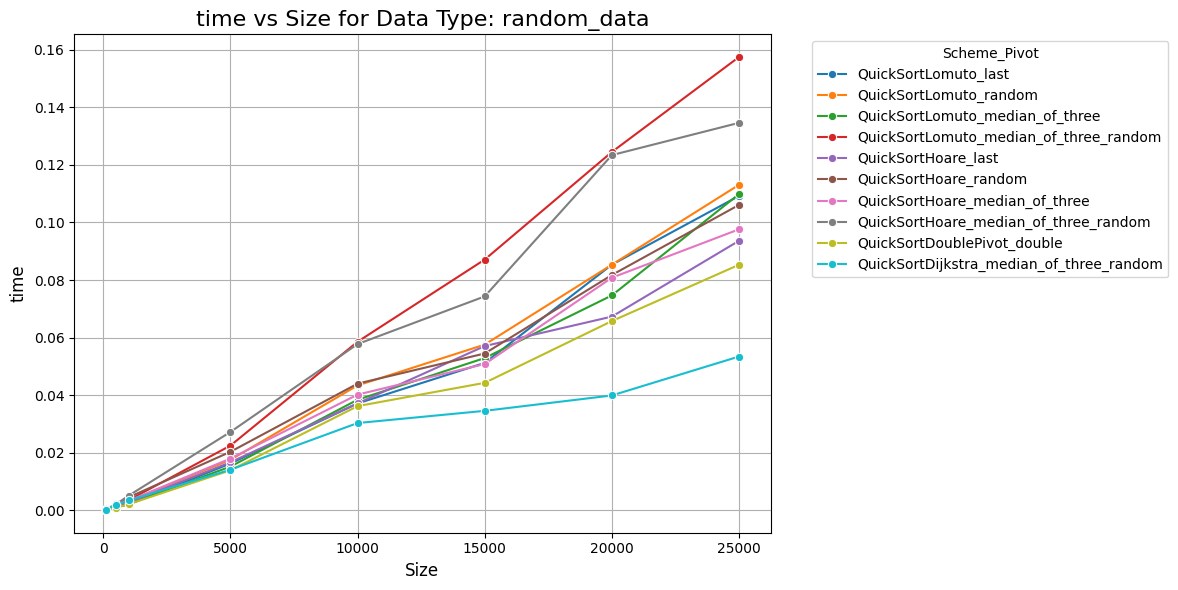

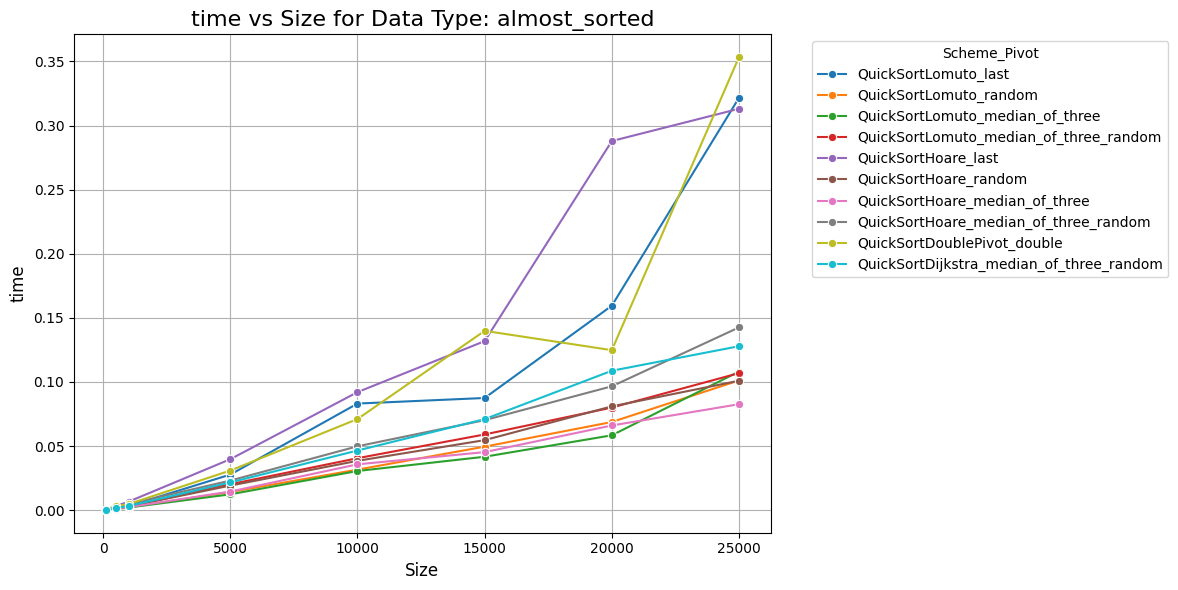

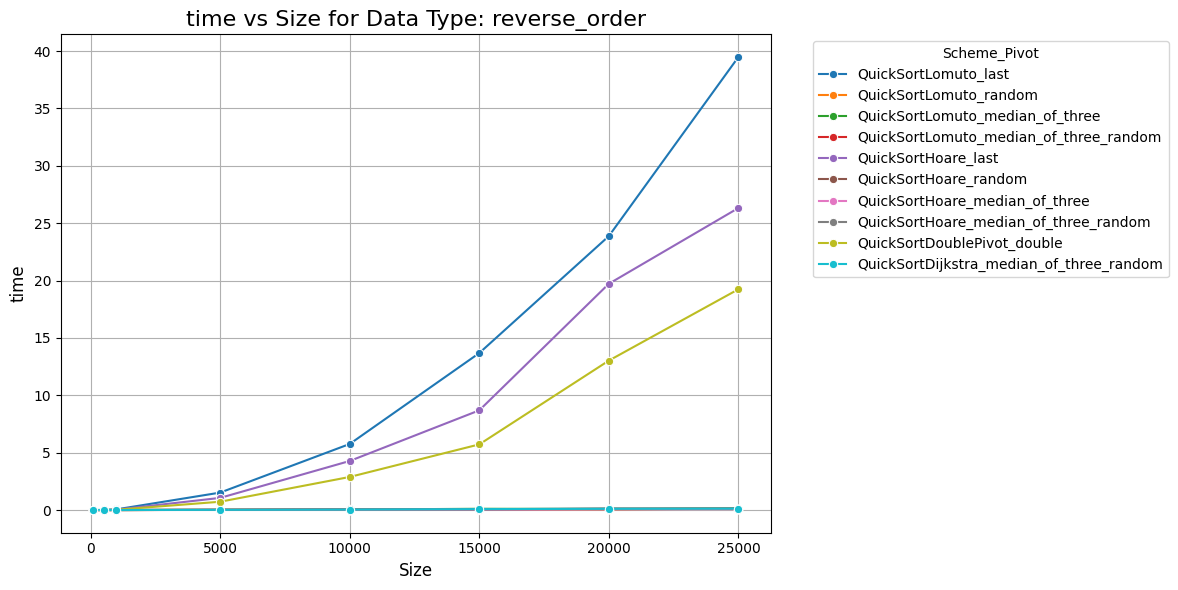

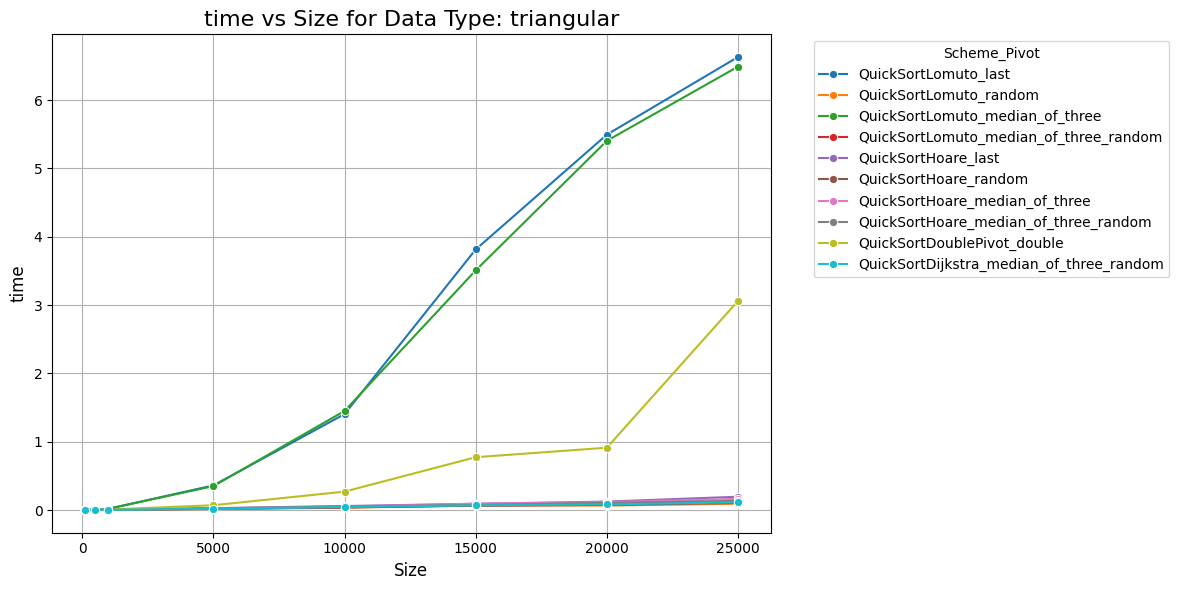

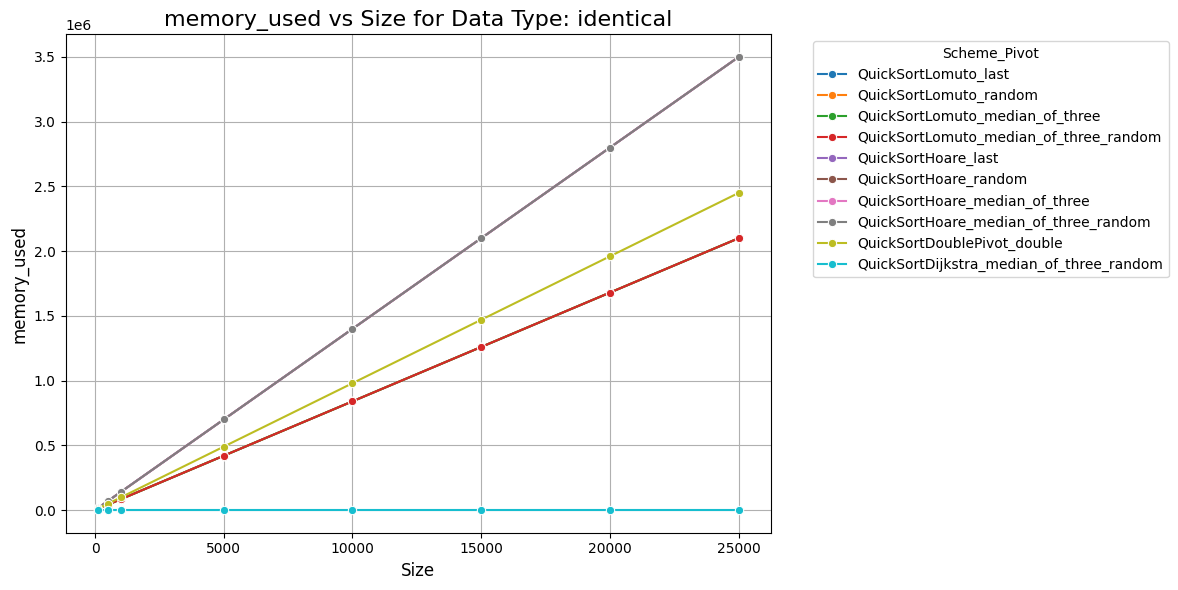

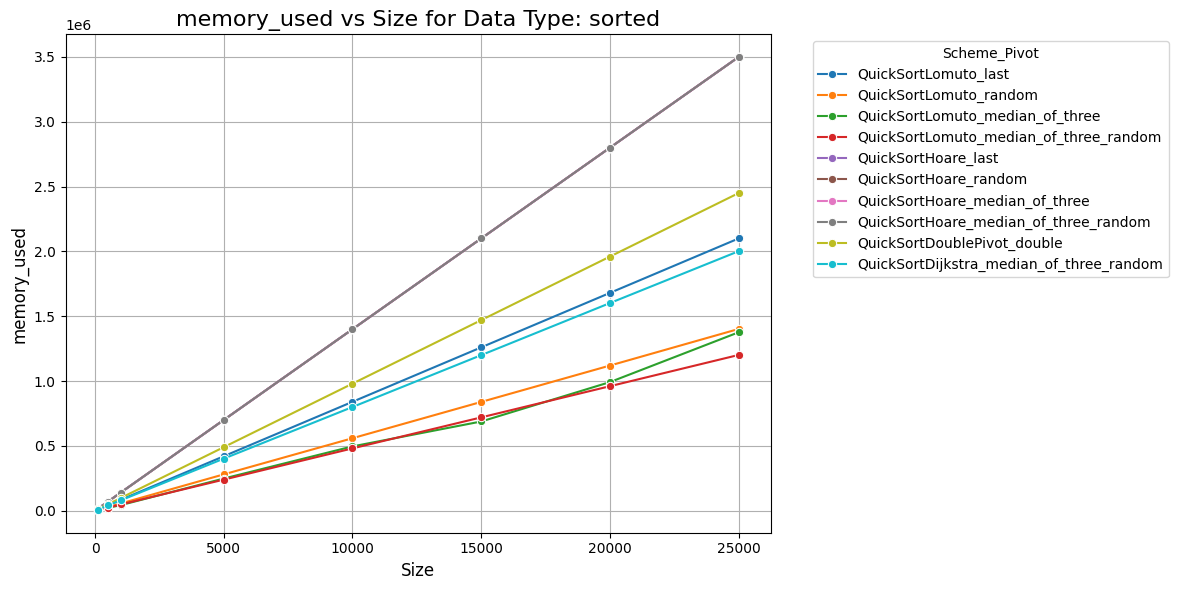

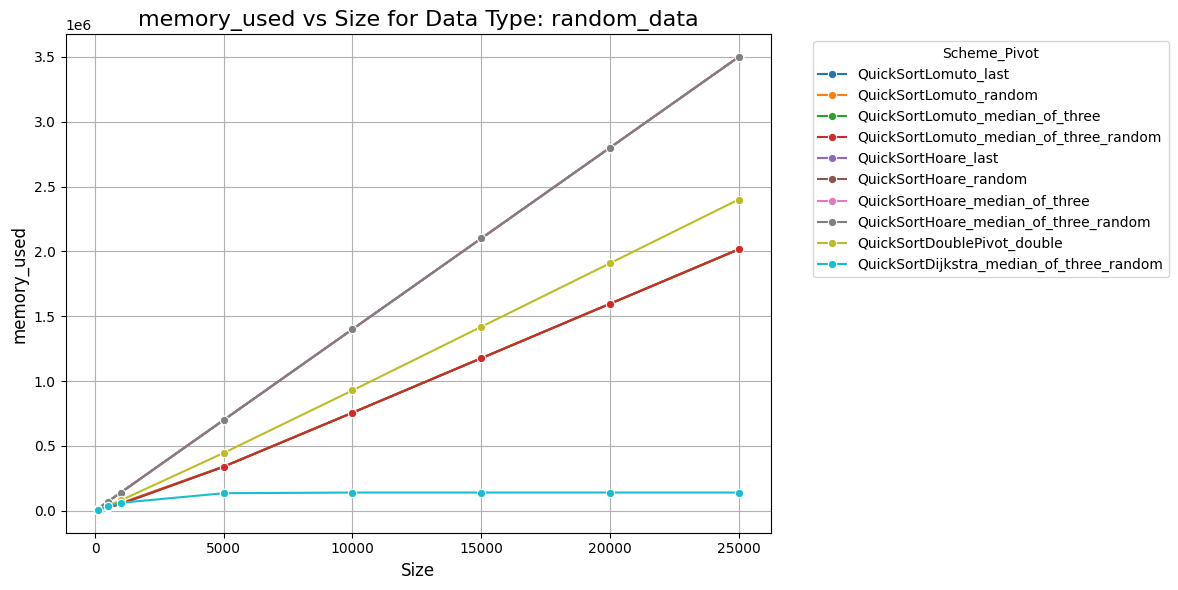

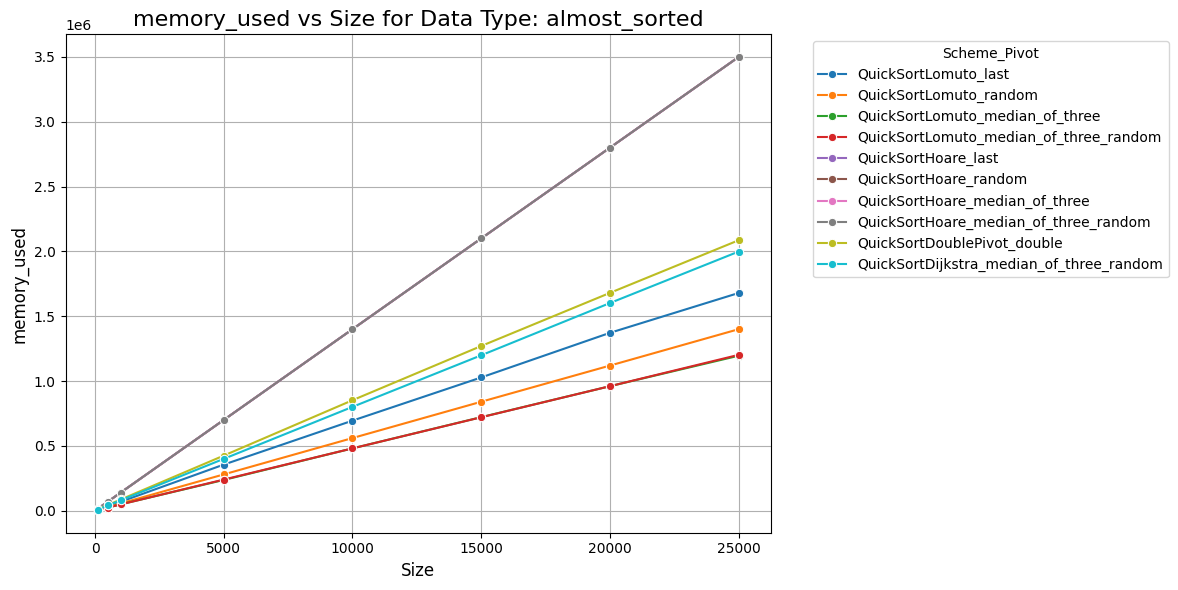

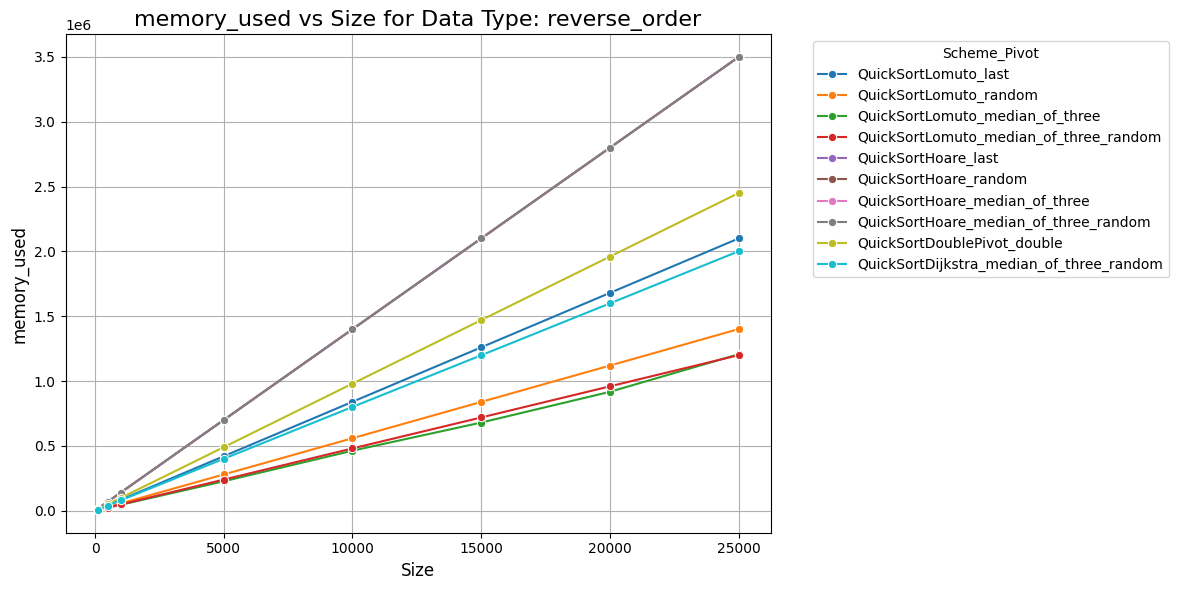

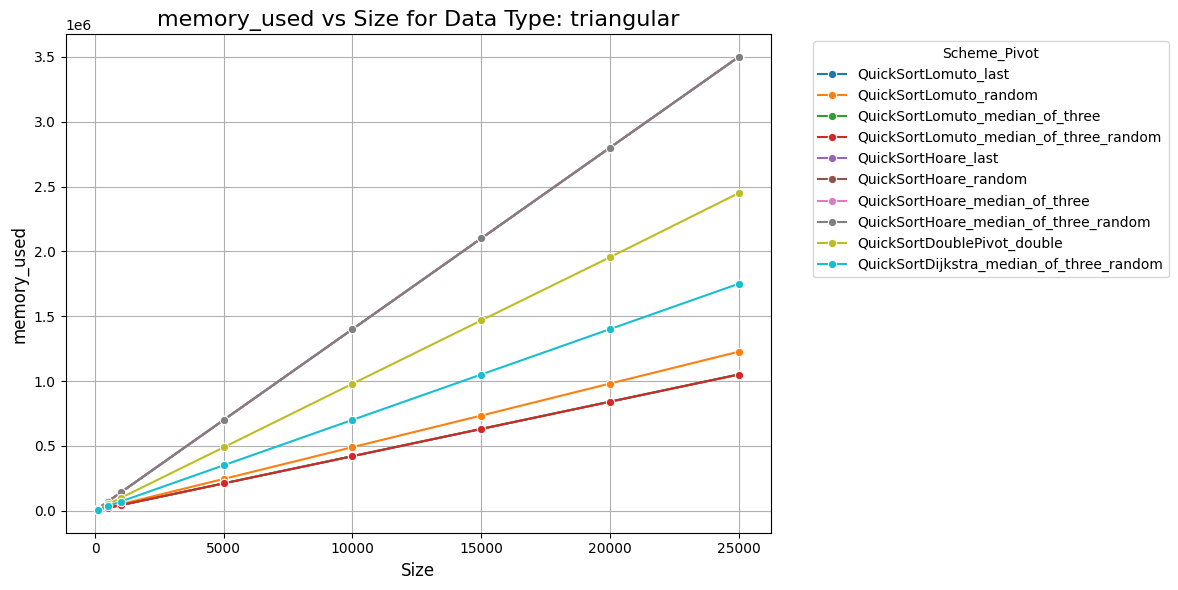

In [31]:
data_types = df["data_type"].unique()
plot_metric_vs_size(data_types, "swaps")
plot_metric_vs_size(data_types, "comparisons")
plot_metric_vs_size(data_types, "time")
plot_metric_vs_size(data_types, "memory_used")


In [ ]:
def plot_metric_vs_size_all(data_types, metric):
    folder_name = f"{metric}_plots"
    os.makedirs(folder_name, exist_ok=True)

    unique_scheme_pivots = df["scheme_pivot"].unique()


    palette = sns.color_palette("tab10", len(unique_scheme_pivots))
    color_mapping = {scheme_pivot: color for scheme_pivot, color in zip(unique_scheme_pivots, palette)}

    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    axes = axes.flatten()  

    for idx, data_type in enumerate(data_types):
        if idx < len(axes):  
            ax = axes[idx]
            subset = df[df["data_type"] == data_type]


            sns.lineplot(
                data=subset,
                x="size",
                y=metric,
                hue="scheme_pivot",
                marker="o",
                palette=color_mapping,
                ax=ax,
            )

            ax.set_title(f"{metric} vs Size for Data Type: {data_type}", fontsize=14)
            ax.set_xlabel("Size", fontsize=12)
            ax.set_ylabel(metric, fontsize=12)
            ax.legend(title="Scheme_Pivot", loc="upper left", fontsize=10)
            ax.grid(True)

    for idx in range(len(data_types), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    

    save_path = os.path.join(folder_name, f"{metric}_vs_size_all.png")
    plt.savefig(save_path)
    plt.show()


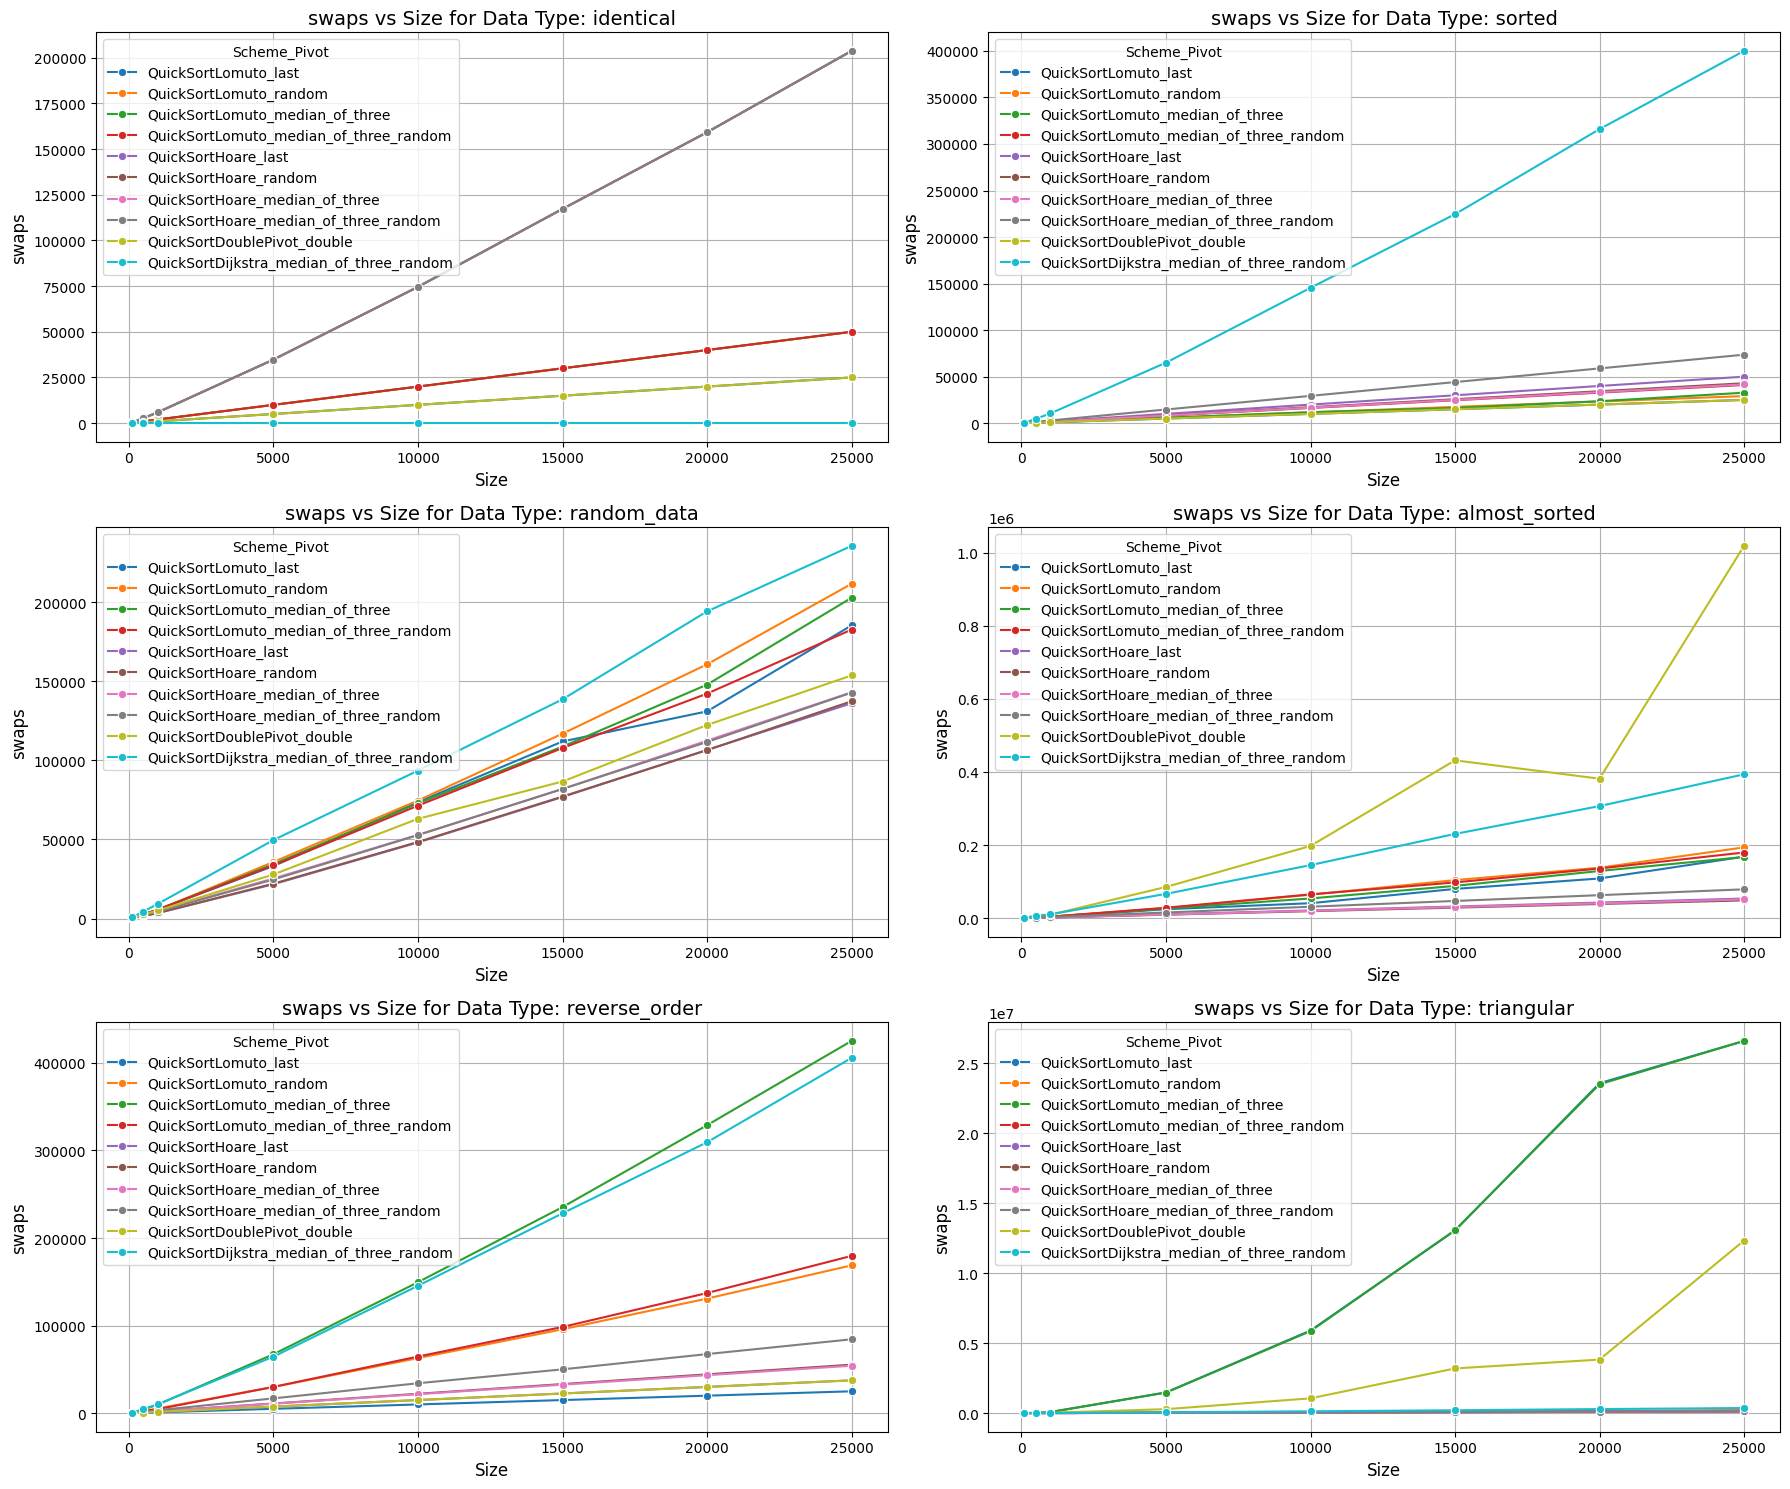

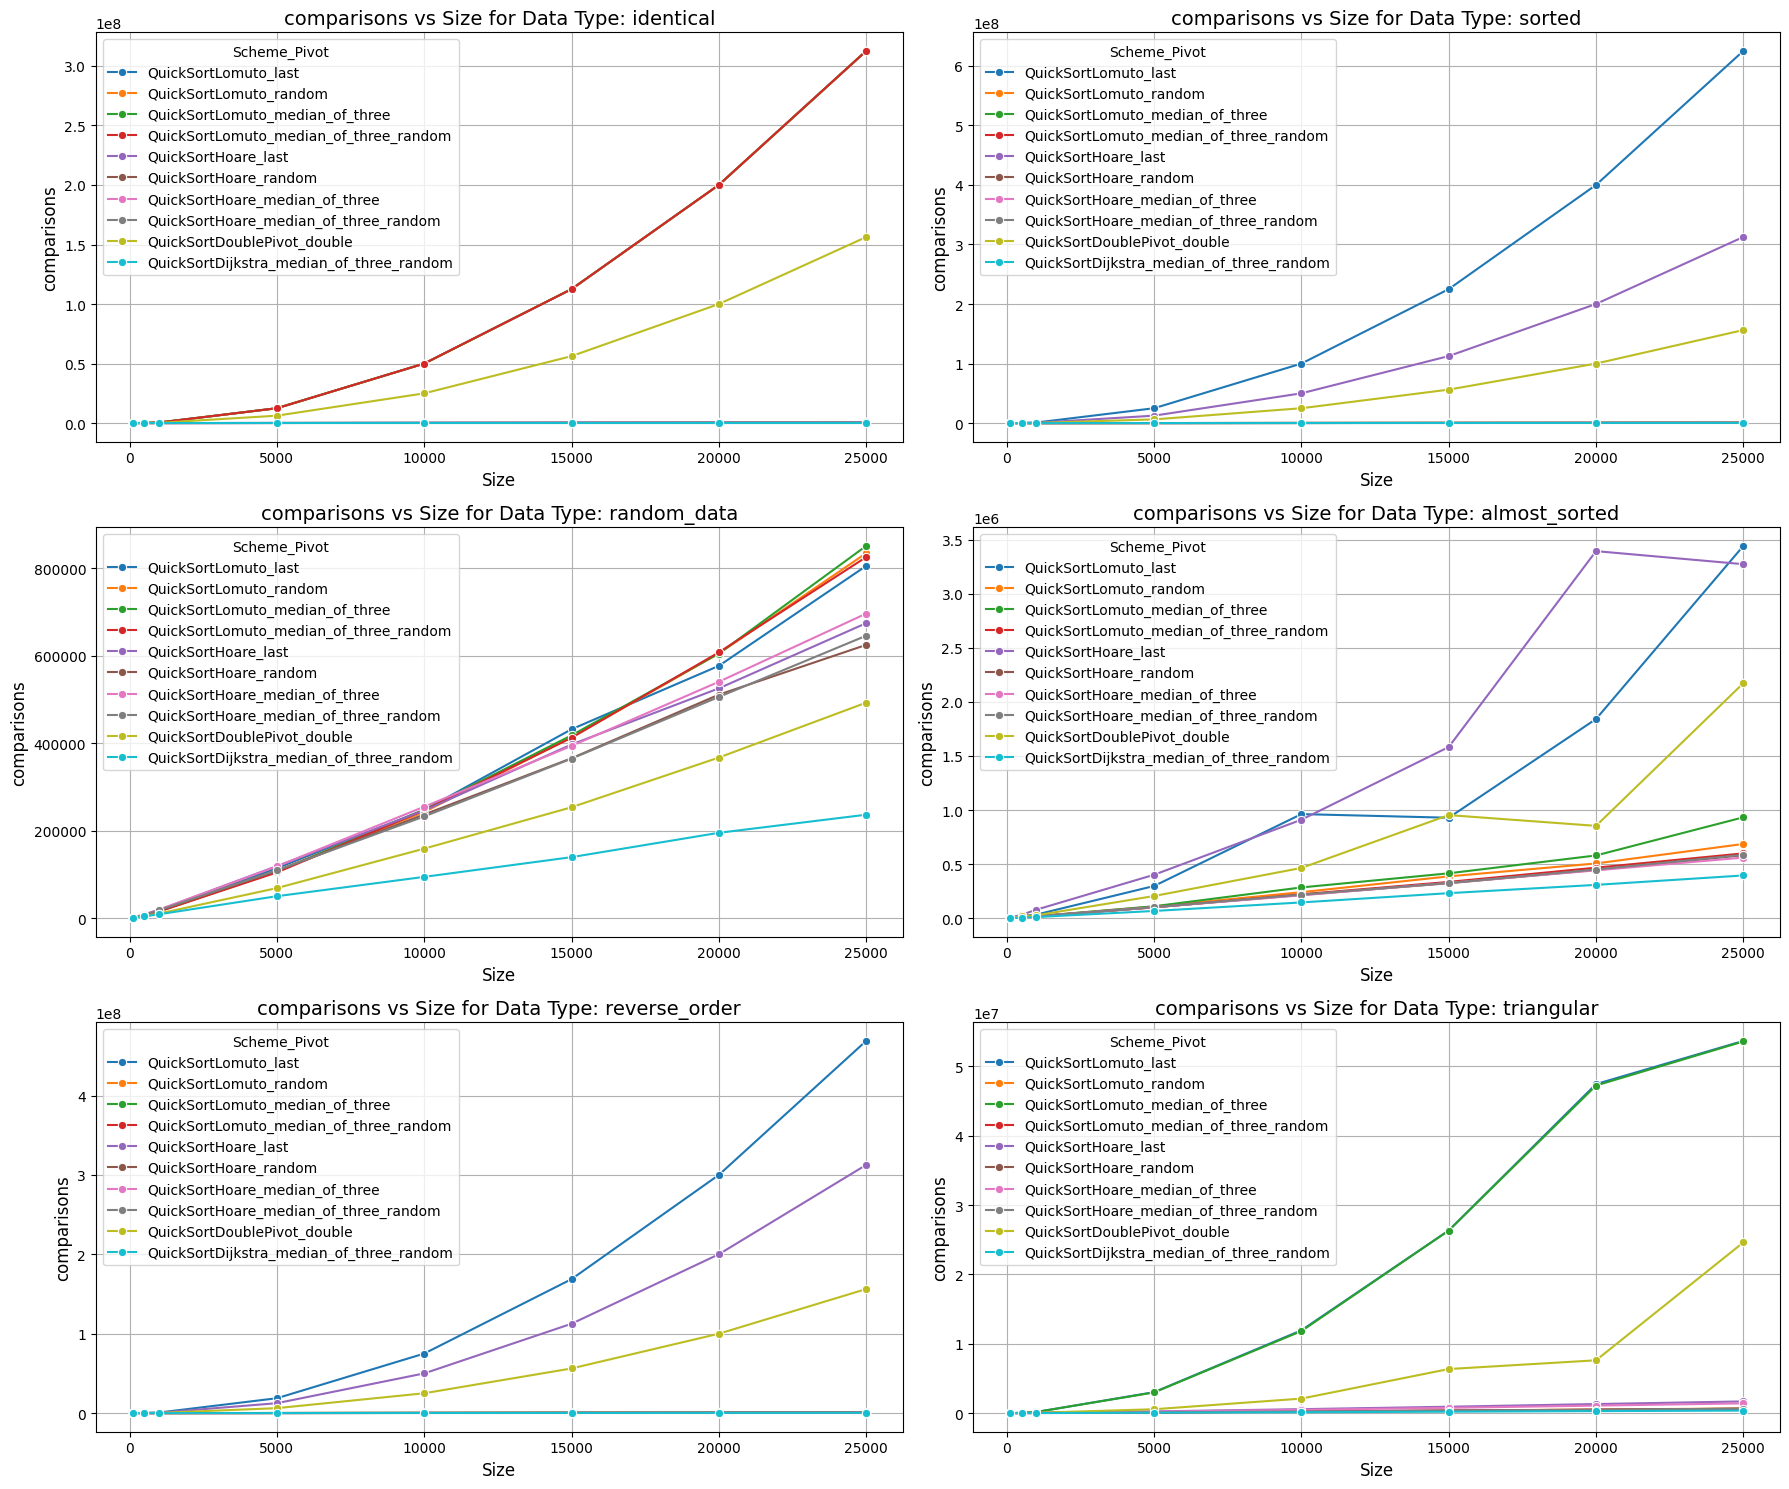

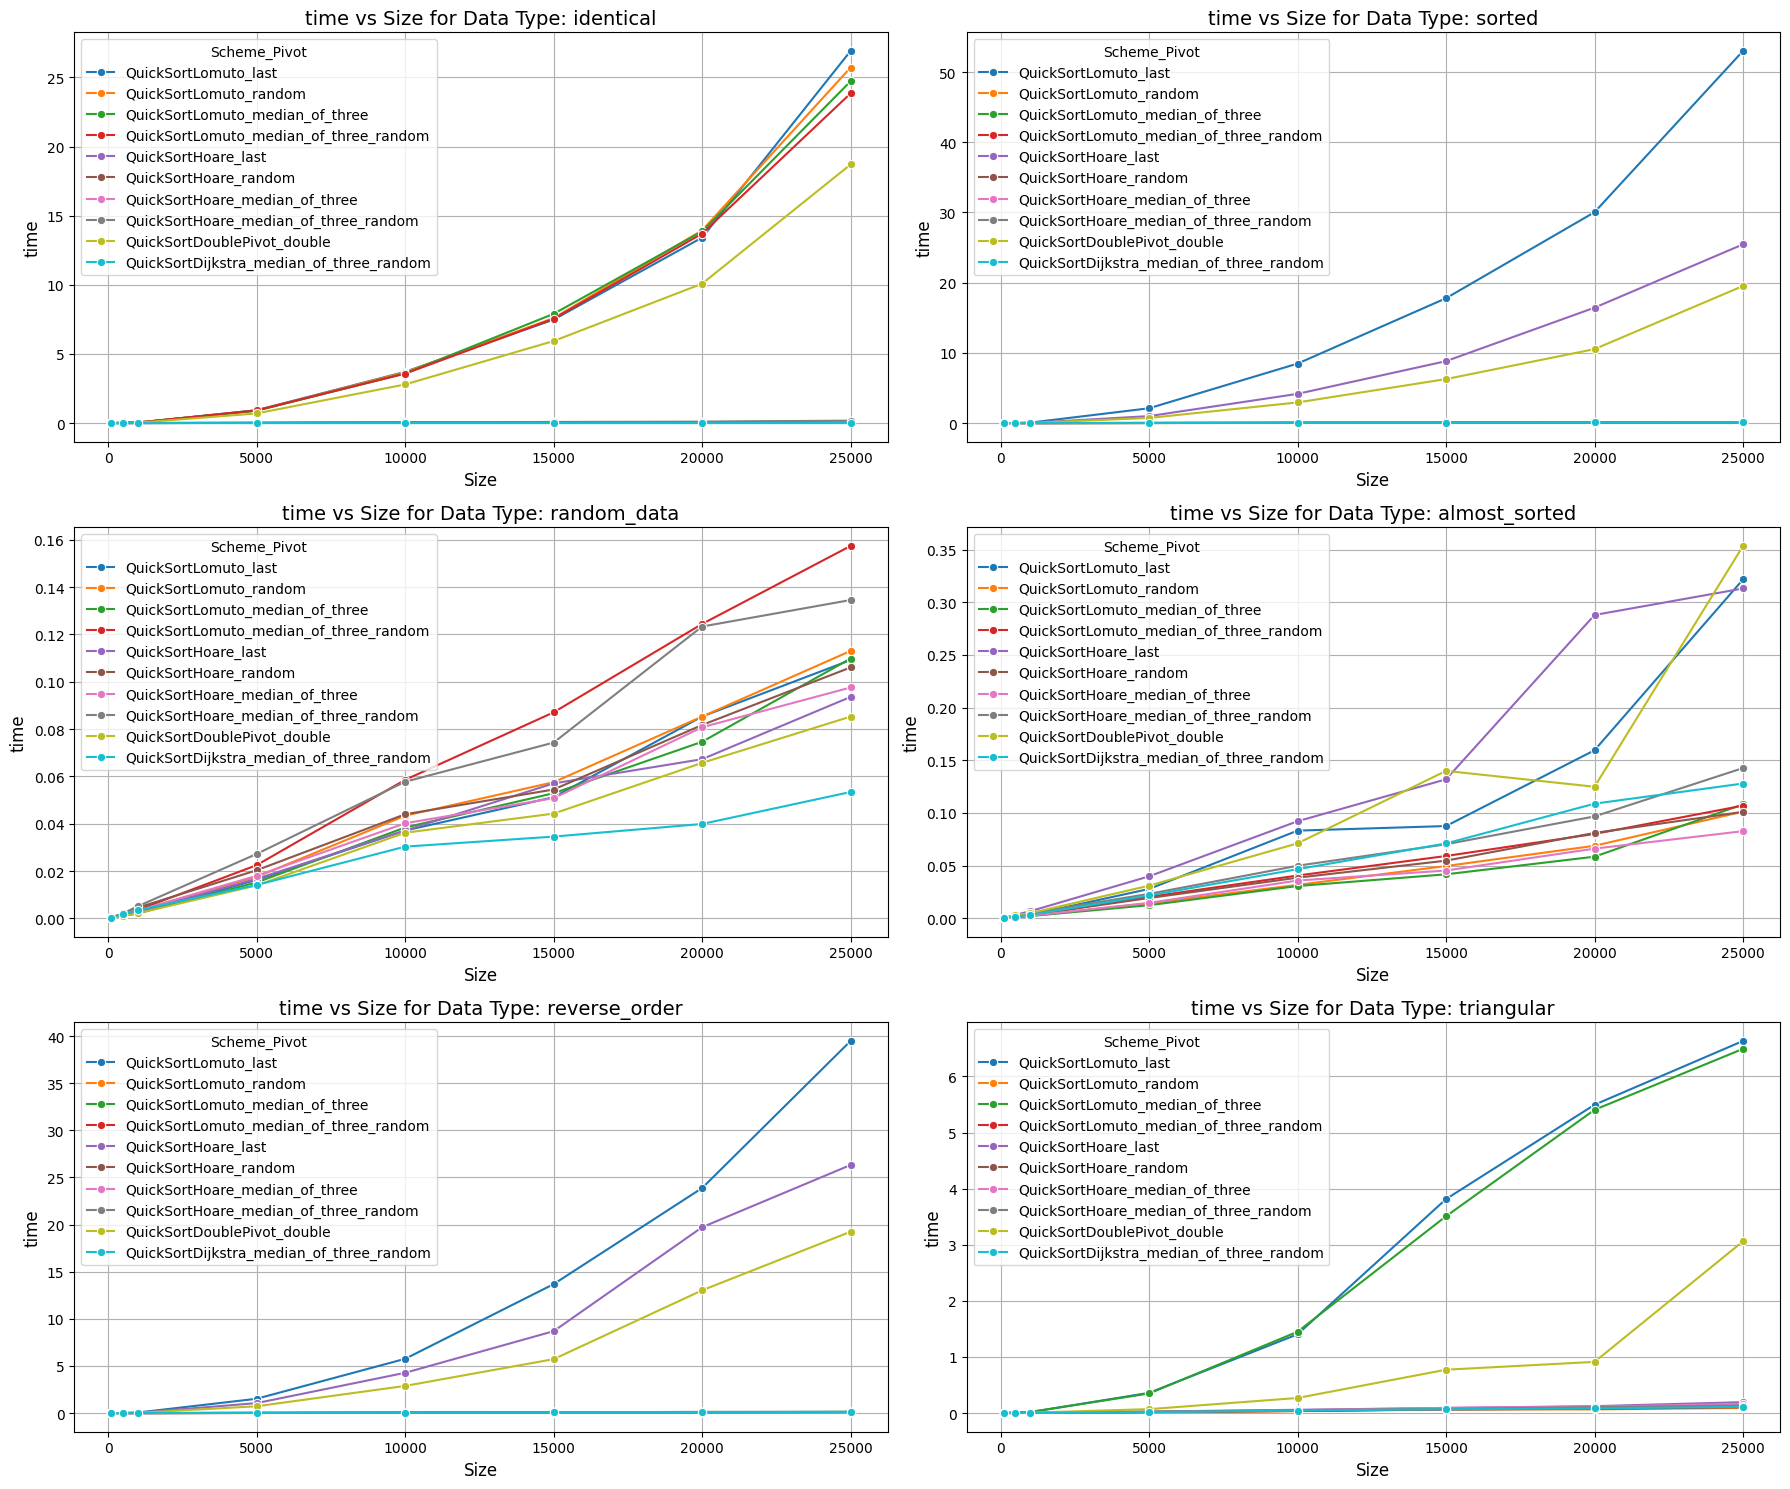

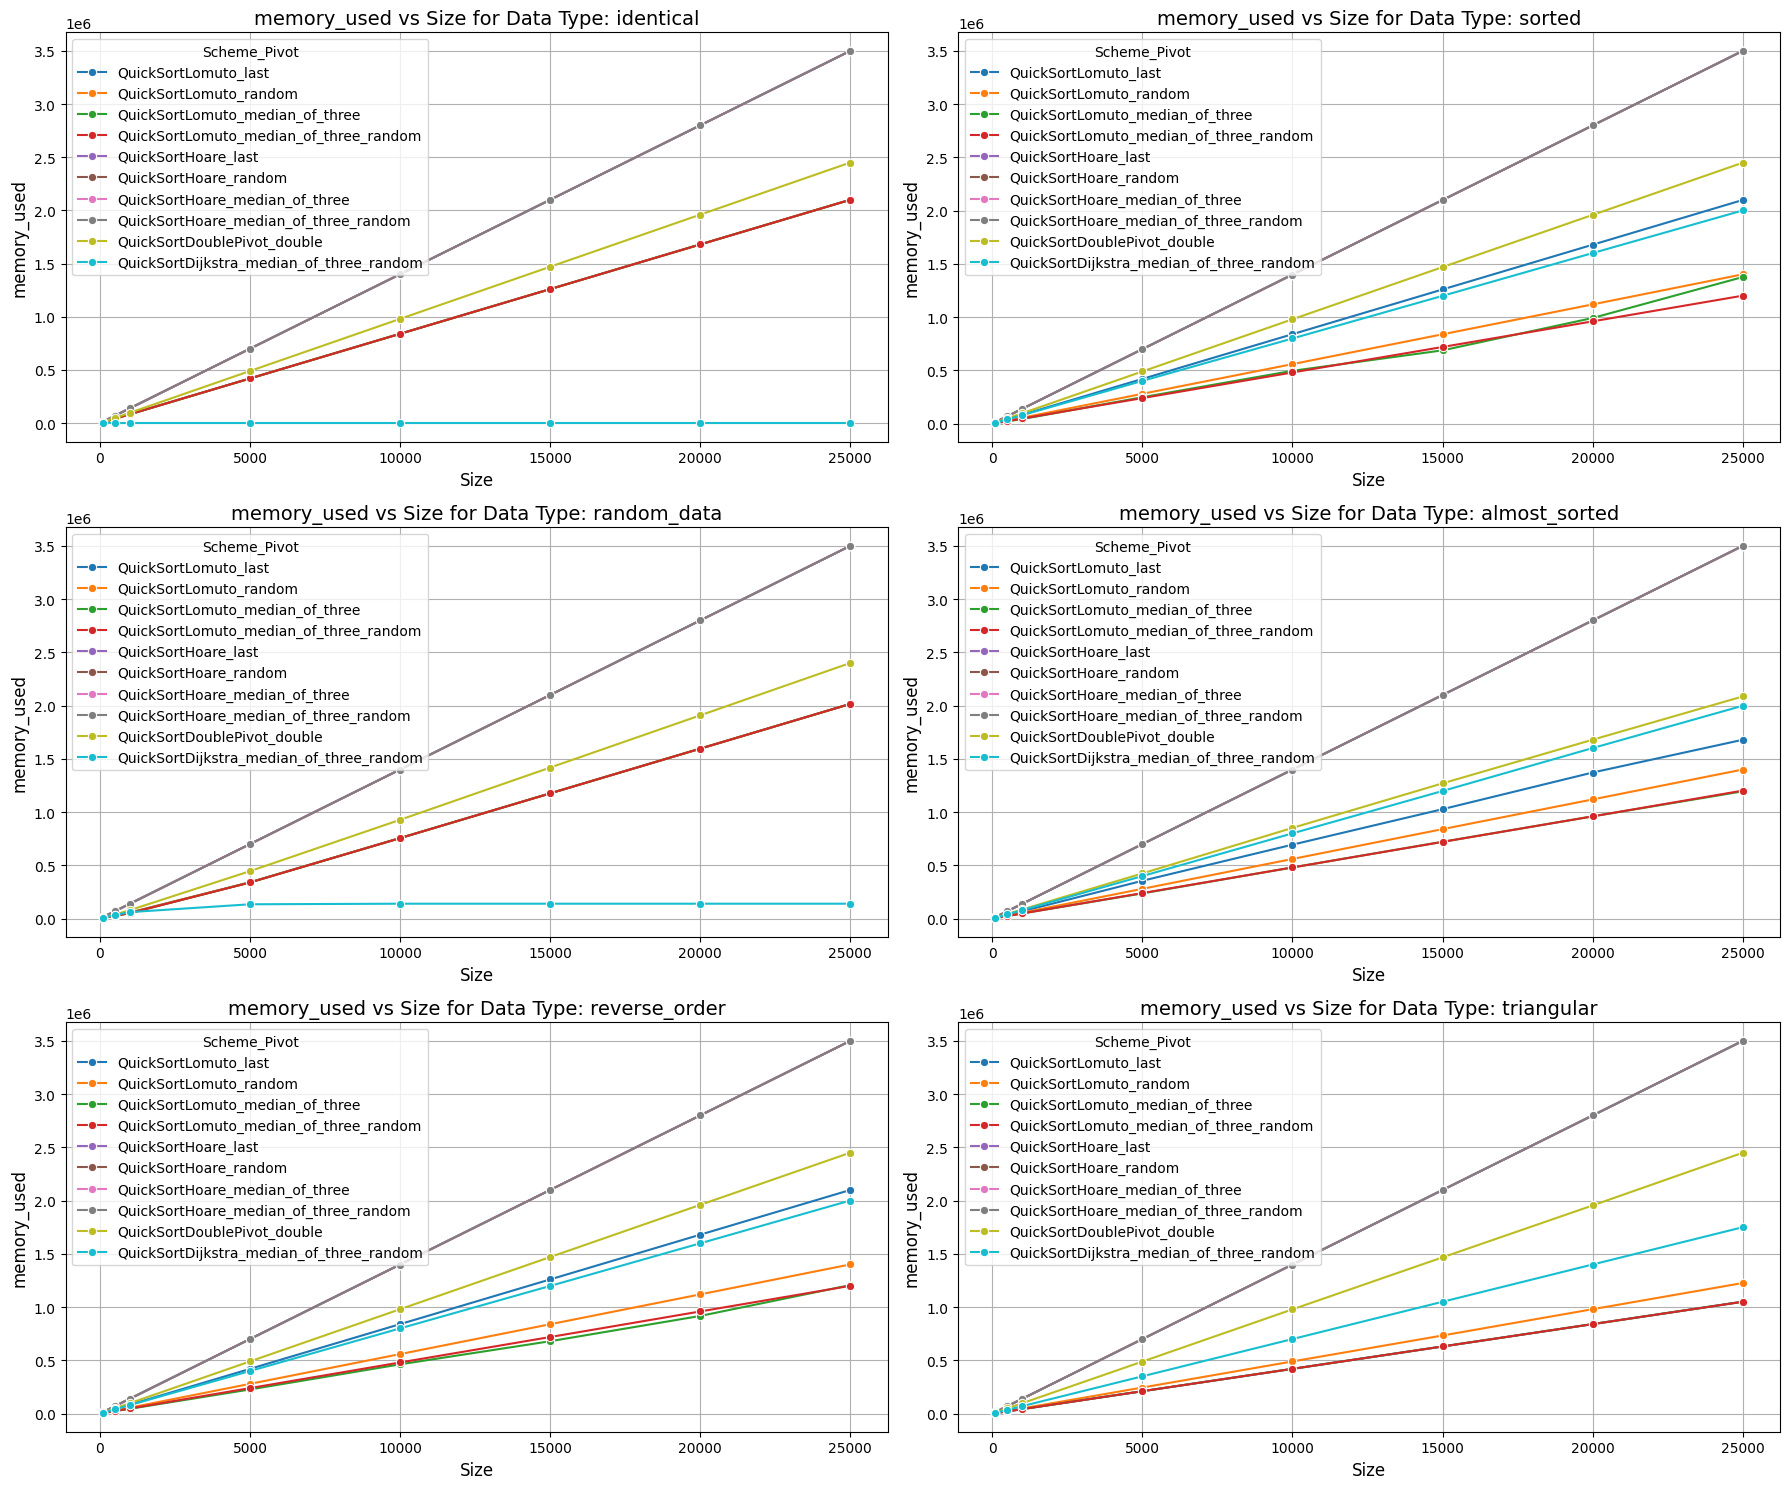

In [ ]:
data_types = df["data_type"].unique()
plot_metric_vs_size_all(data_types, "swaps")
plot_metric_vs_size_all(data_types, "comparisons")
plot_metric_vs_size_all(data_types, "time")
plot_metric_vs_size_all(data_types, "memory_used")


In [2]:
df_dijkstra = pd.read_csv("dijkstra_big_numbers.csv")

In [3]:
df_dijkstra

scheme                   pivot      data_type       size  \
0   QuickSortDijkstra  median_of_three_random      identical     100000   
1   QuickSortDijkstra  median_of_three_random      identical    1000000   
2   QuickSortDijkstra  median_of_three_random      identical   10000000   
3   QuickSortDijkstra  median_of_three_random      identical  100000000   
4   QuickSortDijkstra  median_of_three_random         sorted     100000   
5   QuickSortDijkstra  median_of_three_random         sorted    1000000   
6   QuickSortDijkstra  median_of_three_random         sorted   10000000   
7   QuickSortDijkstra  median_of_three_random         sorted  100000000   
8   QuickSortDijkstra  median_of_three_random    random_data     100000   
9   QuickSortDijkstra  median_of_three_random    random_data    1000000   
10  QuickSortDijkstra  median_of_three_random    random_data   10000000   
11  QuickSortDijkstra  median_of_three_random    random_data  100000000   
12  QuickSortDijkstra  median_of_three_random  almost_sorted     100000   
13  QuickSortDijkstra  median_of_three_random  almost_sorted    1000000   
14  QuickSortDijkstra  median_of_three_random  almost_sorted   10000000   
15  QuickSortDijkstra  median_of_three_random  almost_sorted  100000000   
16  QuickSortDijkstra  median_of_three_random  reverse_order     100000   
17  QuickSortDijkstra  median_of_three_random  reverse_order    1000000   
18  QuickSortDijkstra  median_of_three_random  reverse_order   10000000   
19  QuickSortDijkstra  median_of_three_random  reverse_order  100000000   
20  QuickSortDijkstra  median_of_three_random     triangular     100000   
21  QuickSortDijkstra  median_of_three_random     triangular    1000000   
22  QuickSortDijkstra  median_of_three_random     triangular   10000000   
23  QuickSortDijkstra  median_of_three_random     triangular  100000000   

          time    time_min    time_max       swaps  comparisons  memory_used  
0     0.014094    0.008157    0.020529           1            3          140  
1     0.098599    0.083799    0.116567           1            3          140  
2     0.822340    0.676245    1.047455           1            3          140  
3     7.256528    7.192097    7.325201           1            3          140  
4     0.646288    0.555308    0.774055     1811143      1818272      7997500  
5     5.863297    5.766376    6.003878    22265317     22337087     79999173  
6    69.346087   66.287616   74.320024   260992737    261707398    799968493  
7   780.132309  746.122236  827.013865  3008179062   3015319430   8000203026  
8     0.204505    0.201475    0.207533      949403       950764       140140  
9     2.209977    2.205742    2.216358     9302598      9303939       140140  
10   24.834368   24.700462   24.925680    94480244     94481612       140140  
11  297.950026  291.577555  310.050552   970012344    970013688       140140  
12    0.542189    0.537043    0.549919     1861795      1869001      8007953  
13    5.906962    5.798654    6.002081    22233896     22304816     79986853  
14   65.640742   65.551147   65.716936   260747456    261463178    799988233  
15  796.625435  789.454141  802.645055  3028433397   3035580401   7999989340  
16    0.511373    0.493989    0.531339     1860835      1867995      7996426  
17    5.751032    5.698031    5.851357    22236439     22307977     80002580  
18   67.451217   65.009578   70.273355   264471154    265185838    799948940  
19  847.819122  801.961658  883.977314  3072356952   3079501825   7999927600  
20    0.492863    0.486542    0.503932     1699742      1705978      7000000  
21    6.162879    5.436909    7.062672    20992180     21052318     70000000  
22   64.471653   64.136371   64.946448   249816613    250419642    700000000  
23  772.250303  755.990741  781.033468  2913954005   2919984169   7000000000

In [4]:
import matplotlib.ticker as ticker

In [11]:
def metric_dijkstra_vs_size(df, metric):
    folder_name = f"{metric}_plots_dijkstra"
    os.makedirs(folder_name, exist_ok=True)
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # Plot for sizes other than 100000000
    sns.barplot(x='size', y=metric, hue='data_type', data=df[df['size'] != 100000000], ax=axs[0])
    axs[0].set_xlabel('Size')
    axs[0].set_ylabel(f'{metric}')
    axs[0].set_title(f'{metric} vs size for QuickSortDijkstra')
    axs[0].legend(title='Data Type')
    axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))

    # Plot for size = 100000000 separately
    sns.barplot(x='size', y=metric, hue='data_type', data=df[df['size'] == 100000000], ax=axs[1])
    axs[1].set_xlabel('Size')
    axs[1].set_ylabel(f'{metric}')
    axs[1].set_title(f'{metric} vs size for QuickSortDijkstra (size = 100000000)')
    axs[1].legend(title='Data Type')
    axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))

    plt.tight_layout()
    save_path = os.path.join(folder_name, f"{metric}_vs_size_dijkstra.png")
    plt.savefig(save_path)
    plt.show()
        

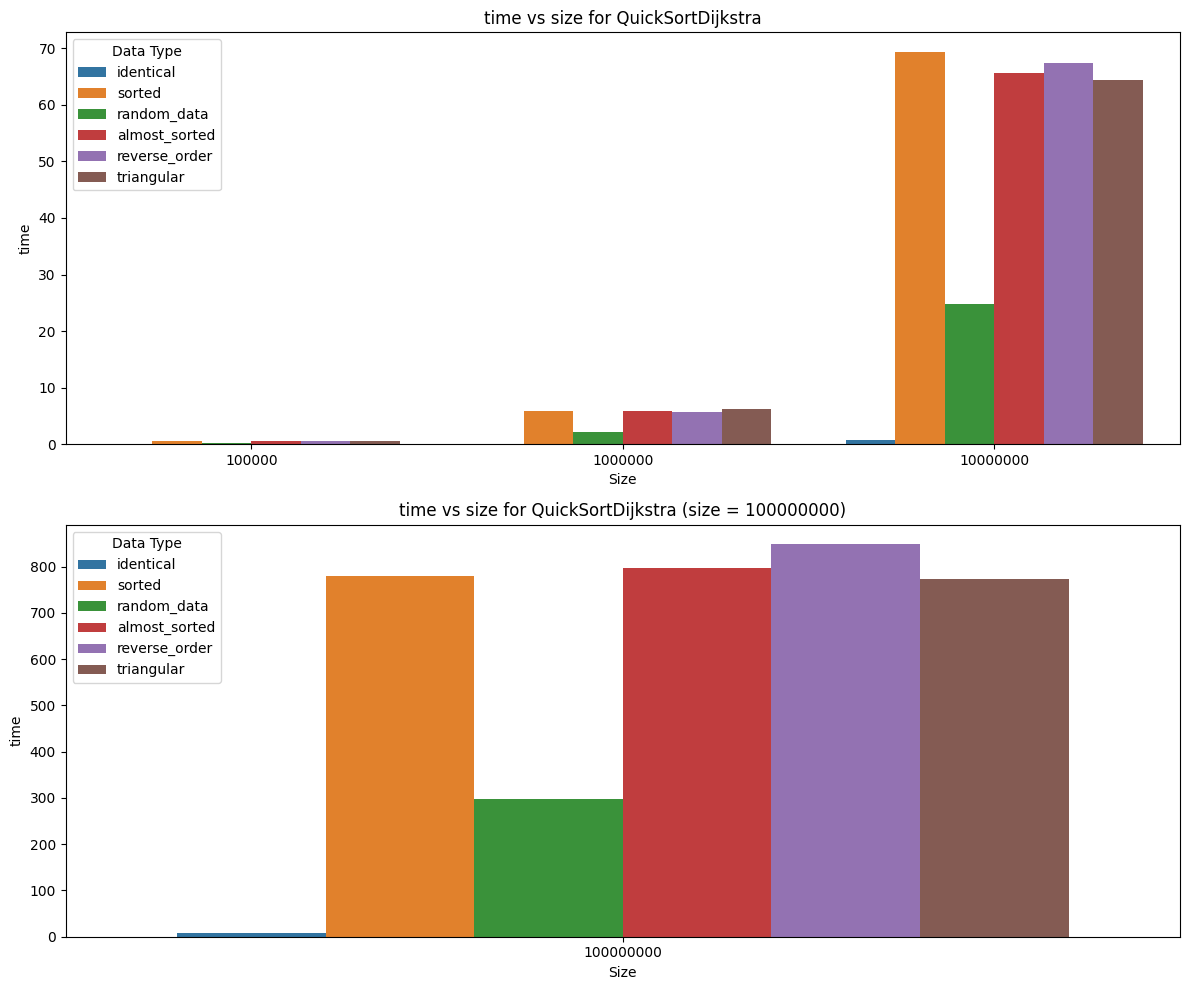

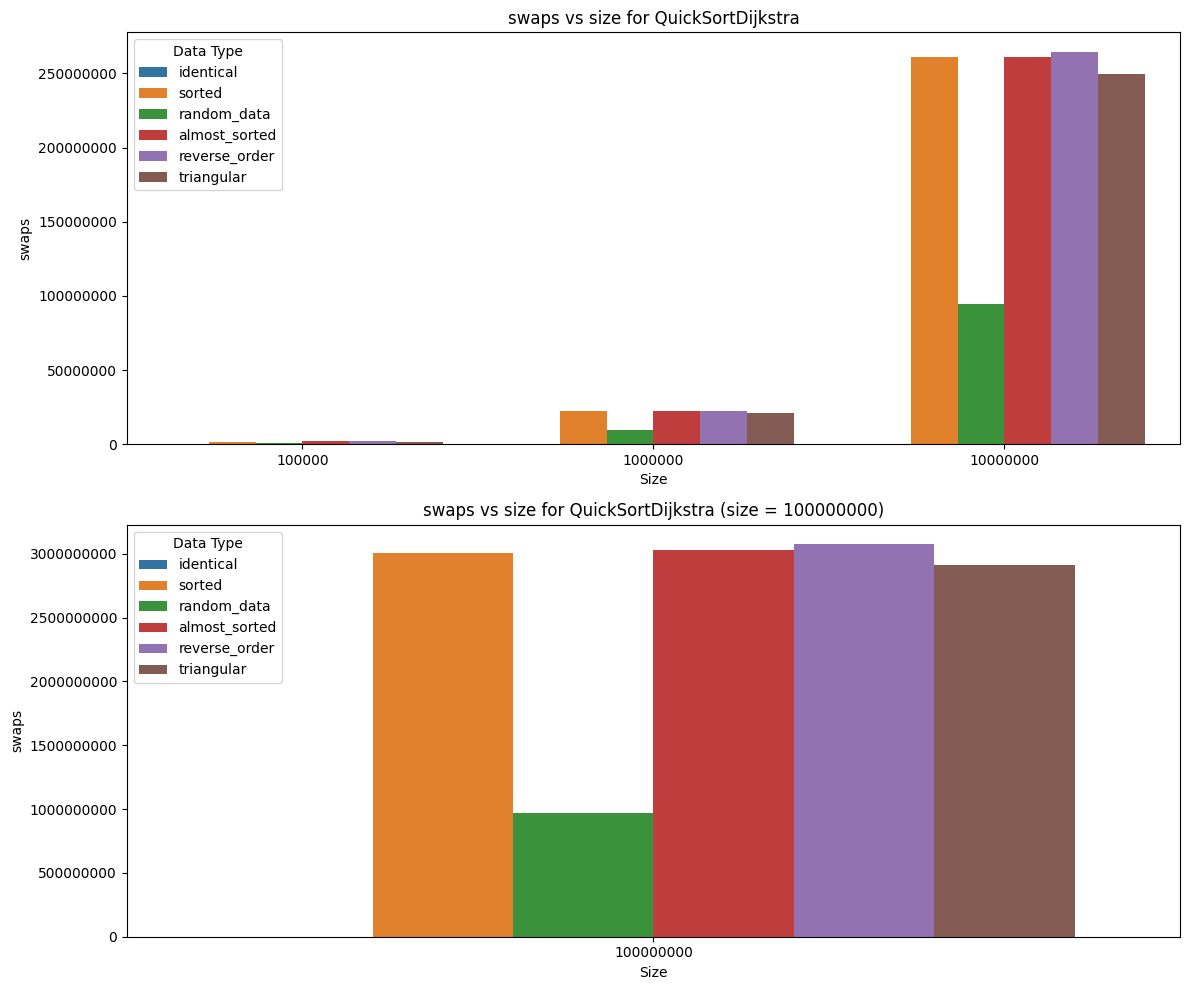

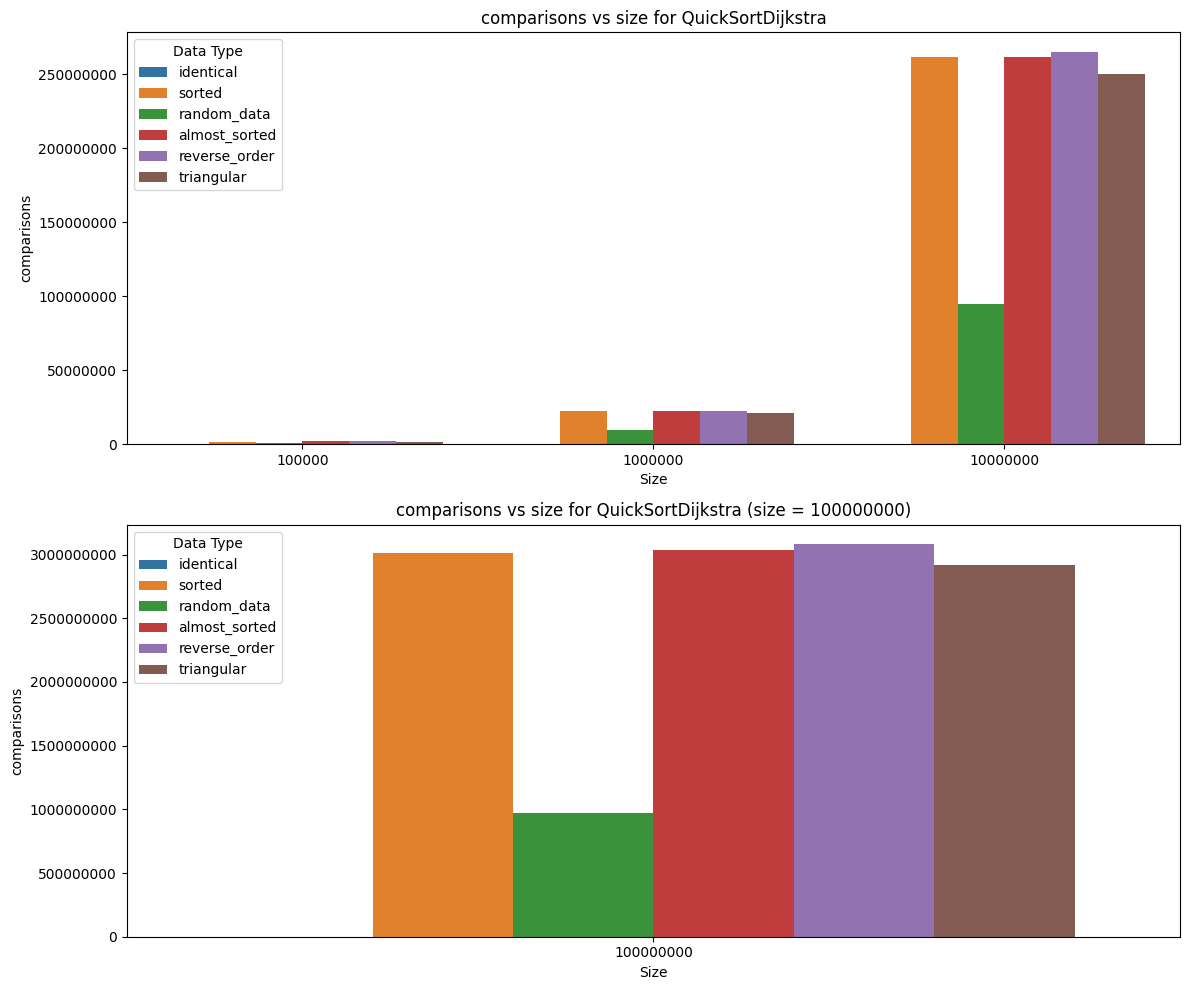

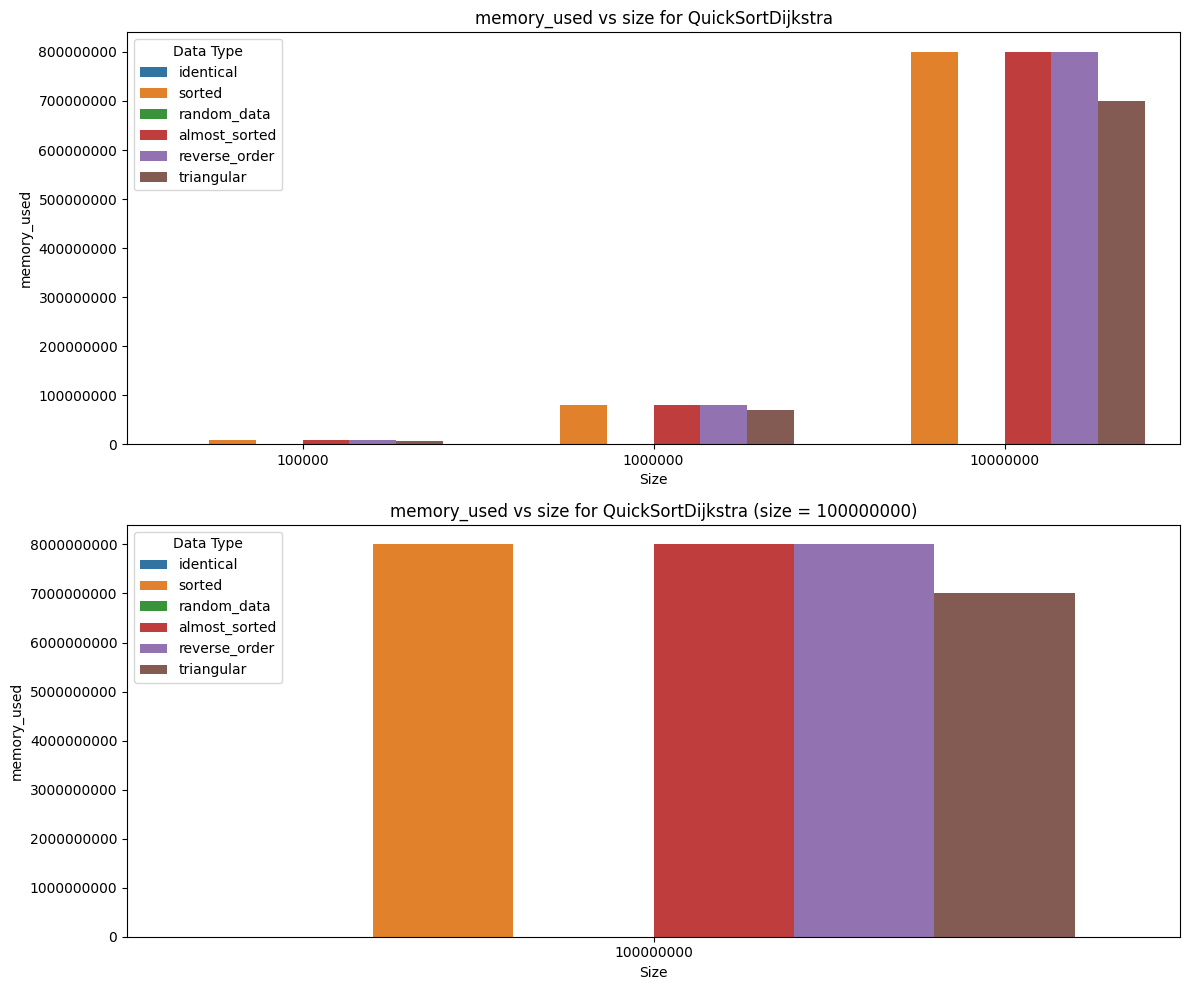

In [12]:
metric_dijkstra_vs_size(df_dijkstra, "time")
metric_dijkstra_vs_size(df_dijkstra, "swaps")
metric_dijkstra_vs_size(df_dijkstra, "comparisons")
metric_dijkstra_vs_size(df_dijkstra, "memory_used")